In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import scipy.optimize as opt
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import itertools
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score
from sklearn import tree

import yfinance as yf
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Data Collection
# Load the CSV file containing the tickers
df = pd.read_csv('ETF_Ticker.csv')

# Initialize lists to store tickers
found_tickers = []
not_found_tickers = []
data_list = []  # To store data for DataFrame

# Function to download data and handle errors
def fetch_data(ticker):
    try:
        data = yf.download(ticker, period="1y")  # Fetch Close and Volume data
        # Reset the index to get 'Date' as a column
        data.reset_index(inplace=True)
        data = data[['Date', 'Close', 'Volume']]
        if data.empty:
            return None  # Data not found
        return data  # Data found
    except Exception as e:
        return None  # An error occurred, return None

# Loop through each ticker and fetch the data
for ticker in df['Ticker']:
    data = fetch_data(ticker)

    if data is not None:
        # Add ticker information to the DataFrame
        print(f"Data found for {ticker}")
        found_tickers.append(ticker)
        data['Ticker'] = ticker
        data_list.append(data)
    else:
        # If no data for either, mark it as not found
        print(f"No data found for {ticker}")
        not_found_tickers.append(ticker)

# Combine all found data into a single DataFrame
if data_list:
    df_raw = pd.concat(data_list)

# Display the lists
print("\nTickers found:", found_tickers)
print("\nTickers not found:", not_found_tickers)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data found for CPSEETF.NS
Data found for AXISGOLD.NS


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data found for AXISNIFTY.NS
Data found for IDFNIFTYET.NS


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data found for ICICIB22.NS
Data found for BSLGOLDETF.NS


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data found for ABSLBANETF.NS
Data found for BSLNIFTY.NS


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data found for ABSLNN50ET.NS
Data found for CPSEETF.NS


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['EBANKNIFTY.NS']: YFInvalidPeriodError("%ticker%: Period '1y' is invalid, must be one of ['1d', '5d', '1mo', 'ytd', 'max']")


Data found for LIQUIDETF.NS
No data found for EBANKNIFTY.NS


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['EBANKNIFTY.NS']: YFInvalidPeriodError("%ticker%: Period '1y' is invalid, must be one of ['1d', '5d', '1mo', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HDFCNIFBAN.NS']: YFInvalidPeriodError("%ticker%: Period '1y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', 'ytd', 'max']")


No data found for EBANKNIFTY.NS
No data found for HDFCNIFBAN.NS


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data found for HDFCSENSEX.NS
Data found for HDFCGOLD.NS


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data found for HDFCNIFTY.NS
Data found for ALPL30IETF.NS


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data found for GOLDIETF.NS
Data found for MIDSELIETF.NS


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data found for LOWVOLIETF.NS
Data found for MIDCAPIETF.NS


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data found for NEXT50IETF.NS
Data found for BANKIETF.NS


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data found for BSE500IETF.NS
Data found for GOLDIETF.NS


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data found for ITIETF.NS


[*********************100%***********************]  1 of 1 completed


Data found for LIQUIDIETF.NS
Data found for NIF100IETF.NS


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data found for NIFTYIETF.NS
Data found for NV20IETF.NS


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data found for SENSEXIETF.NS
Data found for PVTBANIETF.NS


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LICMFGOLD.BO']: YFInvalidPeriodError("%ticker%: Period '1y' is invalid, must be one of ['1d', '5d']")


Data found for BSE500IETF.NS
No data found for LICMFGOLD.BO


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data found for IDFNIFTYET.NS
Data found for IVZINGOLD.NS


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data found for IVZINNIFTY.NS
Data found for BANKNIFTY1.NS


[*********************100%***********************]  1 of 1 completed


Data found for SILVER1.NS


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['KOTAKNIFTYET.BO']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (period=1y)')


Data found for KOTAKGOLD.NS
No data found for KOTAKNIFTYET.BO


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['KTKNV20ETF.NS']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (period=1y)')
[*********************100%***********************]  1 of 1 completed


No data found for KTKNV20ETF.NS
Data found for LICNFNHGP.NS


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data found for LICNETFN50.NS
Data found for LICNETFSEN.NS


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data found for LICMFGOLD.NS
Data found for NEXT50.NS


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data found for MOM50.NS
Data found for MOM100.NS


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data found for MON100.NS
Data found for CONSUMBEES.NS


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data found for DIVOPPBEES.NS
Data found for INFRABEES.NS


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data found for JUNIORBEES.NS
Data found for SETFNIF50.NS

Tickers found: ['CPSEETF.NS', 'AXISGOLD.NS', 'AXISNIFTY.NS', 'IDFNIFTYET.NS', 'ICICIB22.NS', 'BSLGOLDETF.NS', 'ABSLBANETF.NS', 'BSLNIFTY.NS', 'ABSLNN50ET.NS', 'CPSEETF.NS', 'LIQUIDETF.NS', 'HDFCSENSEX.NS', 'HDFCGOLD.NS', 'HDFCNIFTY.NS', 'ALPL30IETF.NS', 'GOLDIETF.NS', 'MIDSELIETF.NS', 'LOWVOLIETF.NS', 'MIDCAPIETF.NS', 'NEXT50IETF.NS', 'BANKIETF.NS', 'BSE500IETF.NS', 'GOLDIETF.NS', 'ITIETF.NS', 'LIQUIDIETF.NS', 'NIF100IETF.NS', 'NIFTYIETF.NS', 'NV20IETF.NS', 'SENSEXIETF.NS', 'PVTBANIETF.NS', 'BSE500IETF.NS', 'IDFNIFTYET.NS', 'IVZINGOLD.NS', 'IVZINNIFTY.NS', 'BANKNIFTY1.NS', 'SILVER1.NS', 'KOTAKGOLD.NS', 'LICNFNHGP.NS', 'LICNETFN50.NS', 'LICNETFSEN.NS', 'LICMFGOLD.NS', 'NEXT50.NS', 'MOM50.NS', 'MOM100.NS', 'MON100.NS', 'CONSUMBEES.NS', 'DIVOPPBEES.NS', 'INFRABEES.NS', 'JUNIORBEES.NS', 'SETFNIF50.NS']

Tickers not found: ['EBANKNIFTY.NS', 'EBANKNIFTY.NS', 'HDFCNIFBAN.NS', 'LICMFGOLD.BO', 'KOTAKNIFTYET.BO', 'KTKNV20ETF.NS']


In [3]:
# Display the df_raw DataFrame
df_raw.head()

Date      Close   Volume      Ticker
0 2023-09-25  52.299999   590548  CPSEETF.NS
1 2023-09-26  52.470001   374480  CPSEETF.NS
2 2023-09-27  52.660000   568538  CPSEETF.NS
3 2023-09-28  52.520000  1165245  CPSEETF.NS
4 2023-09-29  53.580002  1359954  CPSEETF.NS

In [4]:
df_raw.shape

(11569, 4)

In [5]:
df1 = df_raw.copy()

In [6]:
#Data Handling
# Replace zeros with the next row data, and if next row is zero, replace with previous row data
df_raw['Volume'] = df_raw['Volume'].replace(0, pd.NA).fillna(method='bfill').fillna(method='ffill')
df_raw['Close'] = df_raw['Close'].replace(0, pd.NA).fillna(method='bfill').fillna(method='ffill')

# Drop rows with zeros in addition to NaN
df_raw = df_raw[(df_raw['Volume'] != 0) | (df_raw['Close'] != 0)]

# Display the cleaned DataFrame
df_raw.shape

(11569, 4)

In [7]:
# Merge df and df1 on the 'Ticker' column
df_raw = pd.merge(df, df_raw, on='Ticker', how='left')

# Save the raw data to CSV
if not df_raw.empty:
    df_raw.to_csv("df_raw.csv", index=False)

# The resulting df_merged will now have 'Name' column added to the original 'df'
df_raw.head()

Name      Ticker       Date      Close     Volume
0  CPSE Exchange Traded Fund  CPSEETF.NS 2023-09-25  52.299999   590548.0
1  CPSE Exchange Traded Fund  CPSEETF.NS 2023-09-26  52.470001   374480.0
2  CPSE Exchange Traded Fund  CPSEETF.NS 2023-09-27  52.660000   568538.0
3  CPSE Exchange Traded Fund  CPSEETF.NS 2023-09-28  52.520000  1165245.0
4  CPSE Exchange Traded Fund  CPSEETF.NS 2023-09-29  53.580002  1359954.0

In [8]:
# Count of NaN values for each column
nan_count = df_raw.isna().sum()
nan_count

Name      0
Ticker    0
Date      6
Close     6
Volume    6
dtype: int64

In [9]:
df_raw.dropna(inplace=True)
nan_count1 = df_raw.isna().sum()
nan_count1

Name      0
Ticker    0
Date      0
Close     0
Volume    0
dtype: int64

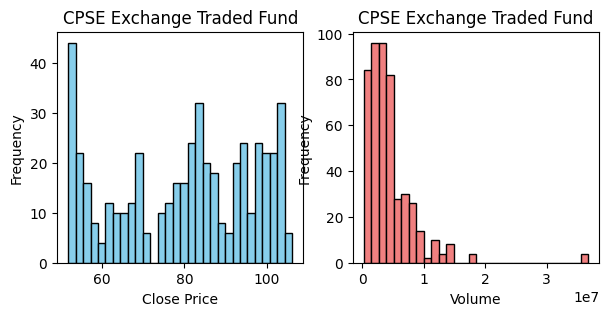

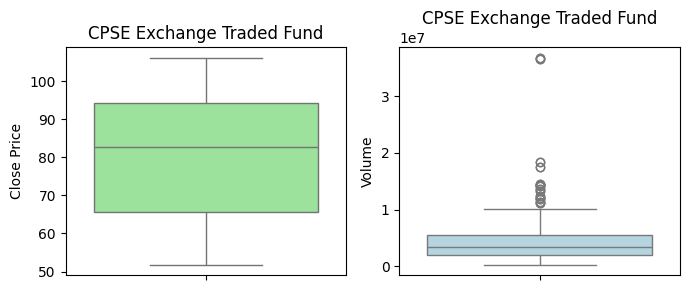

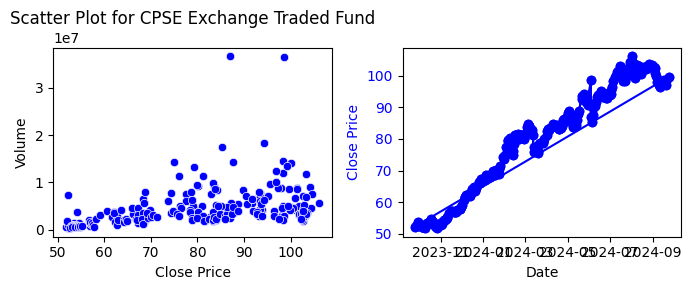

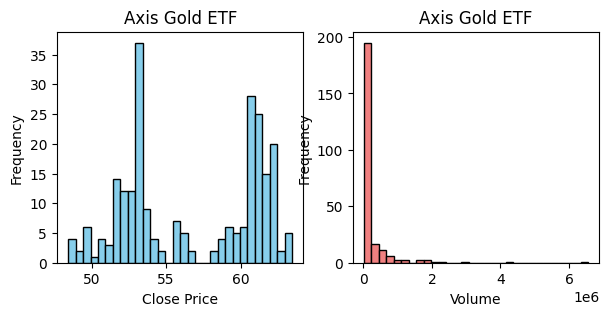

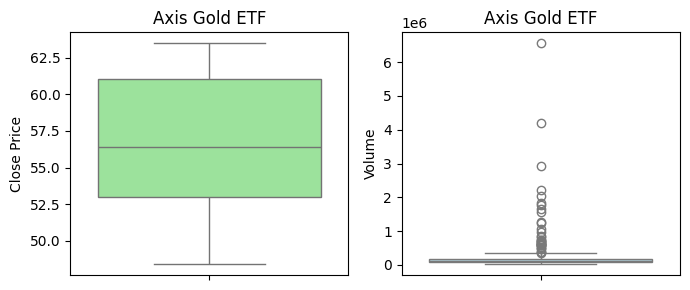

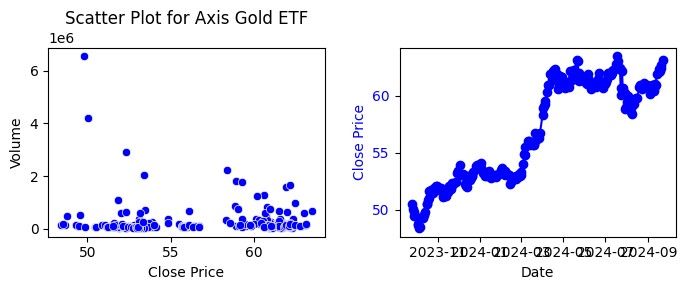

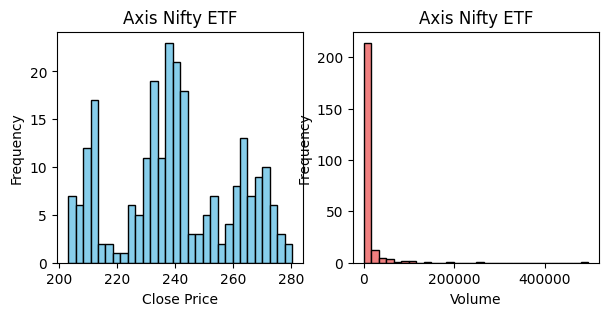

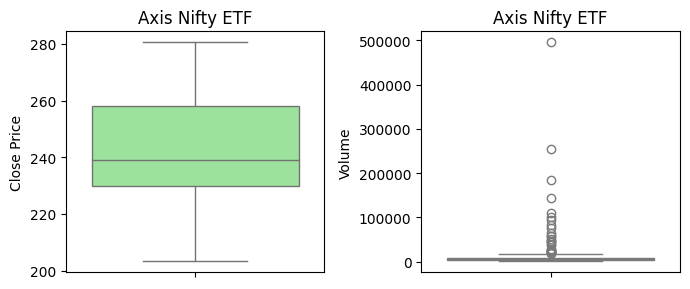

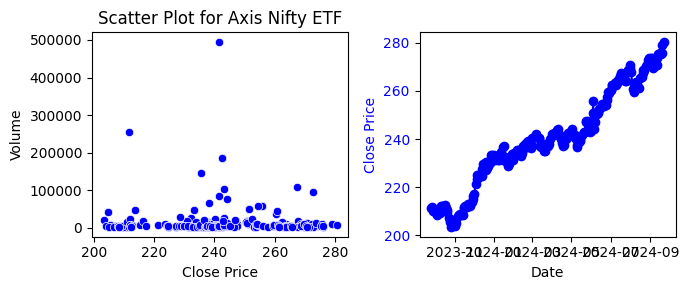

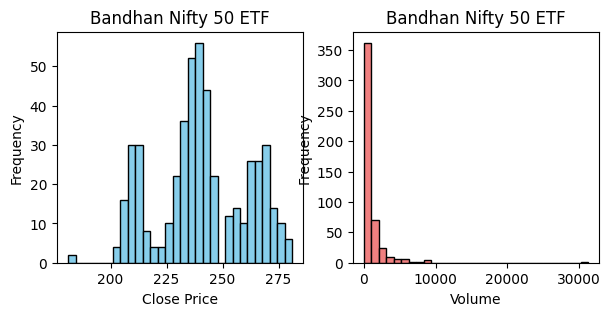

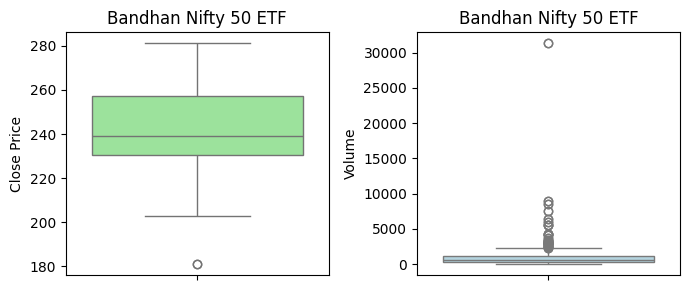

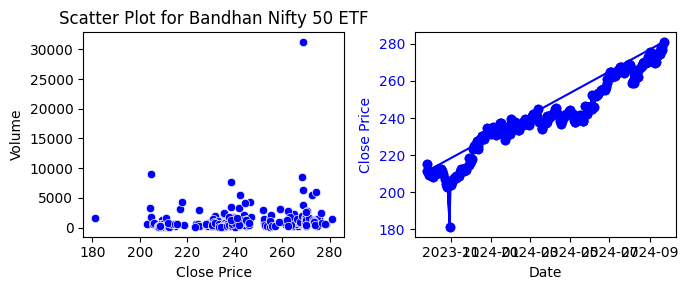

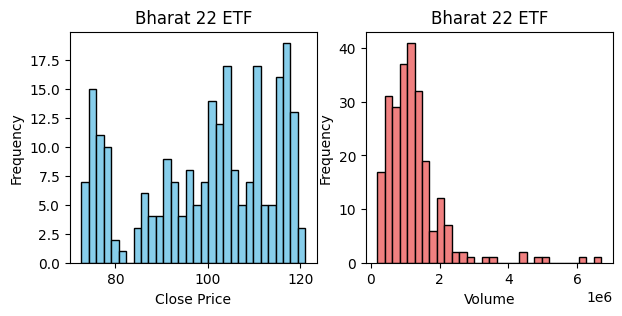

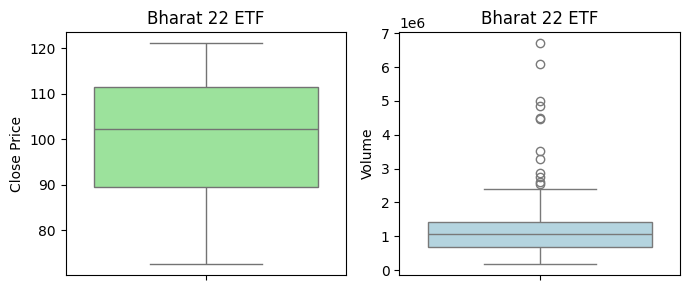

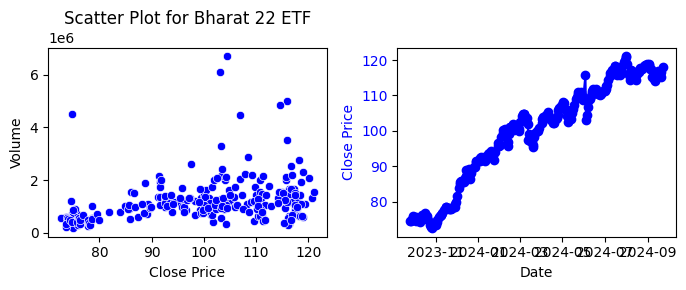

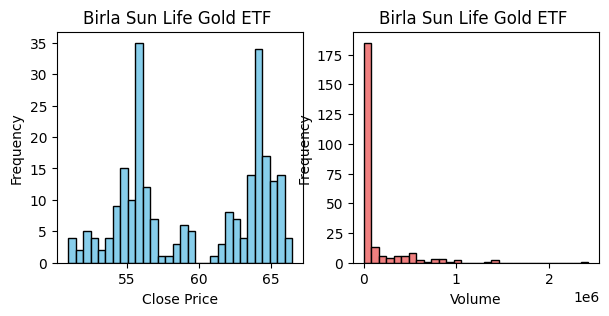

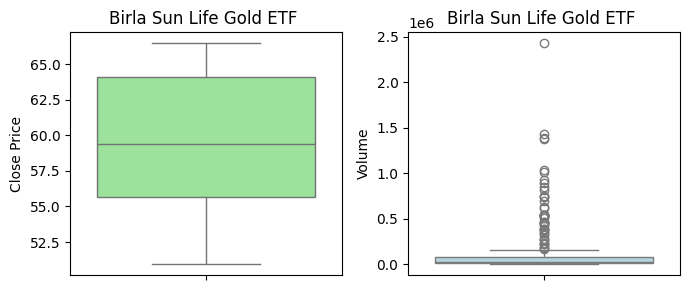

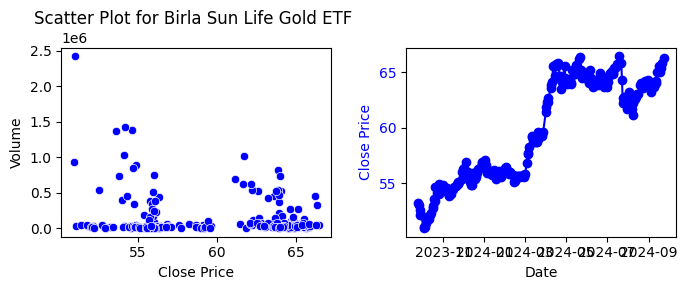

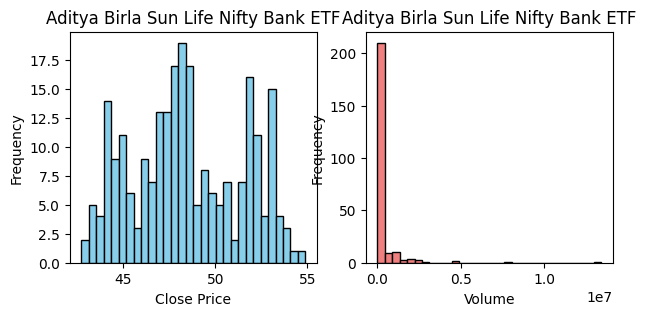

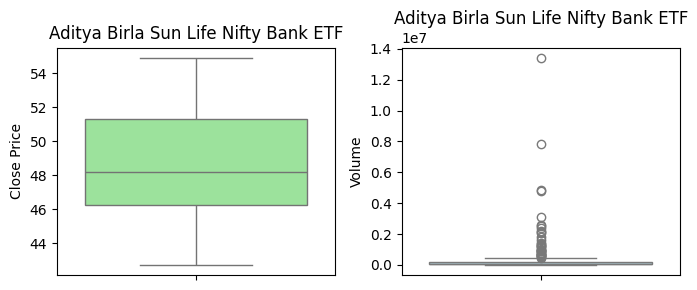

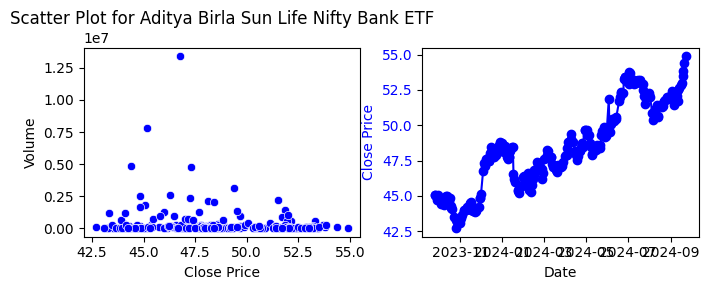

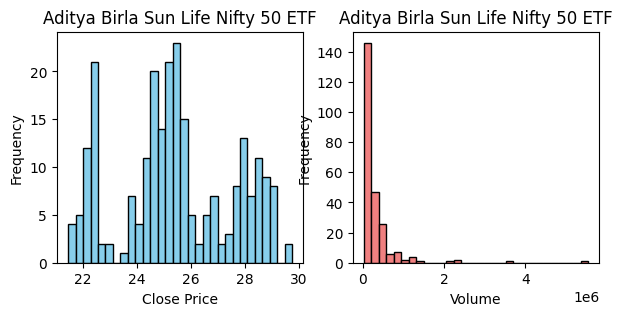

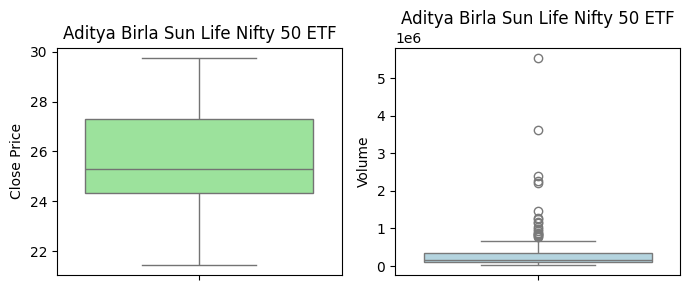

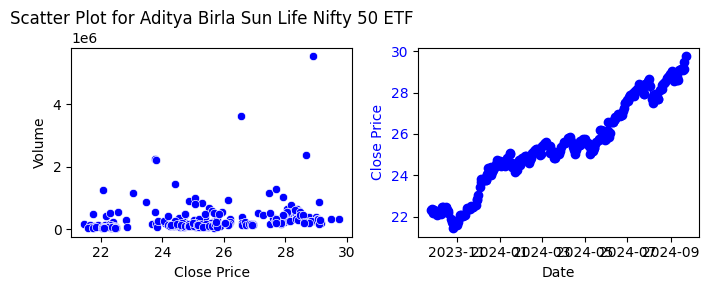

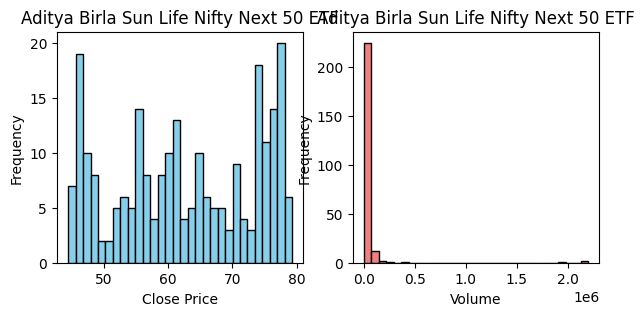

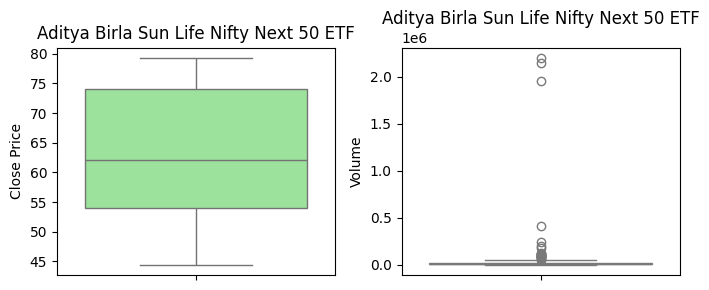

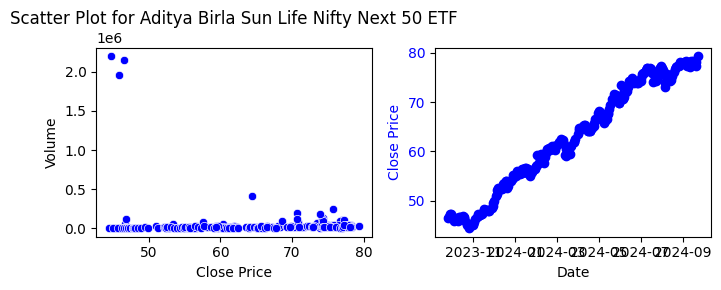

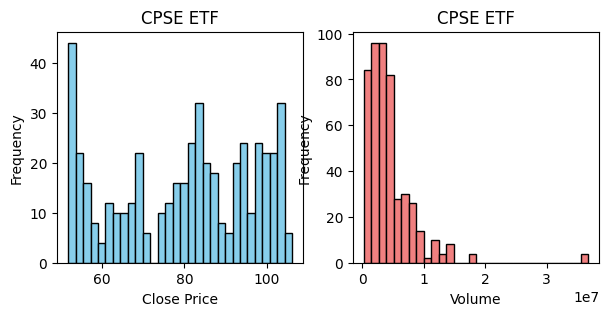

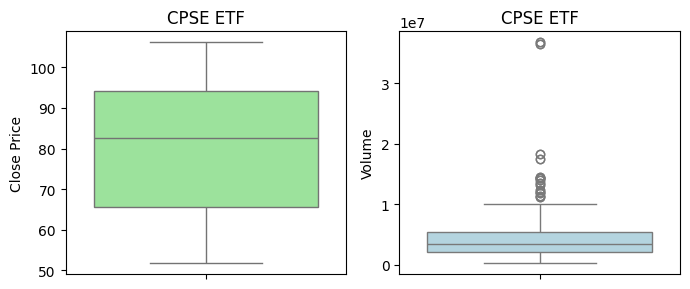

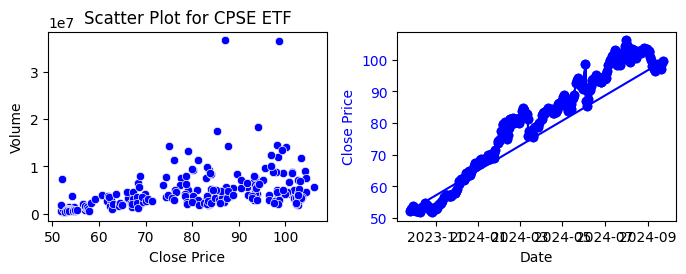

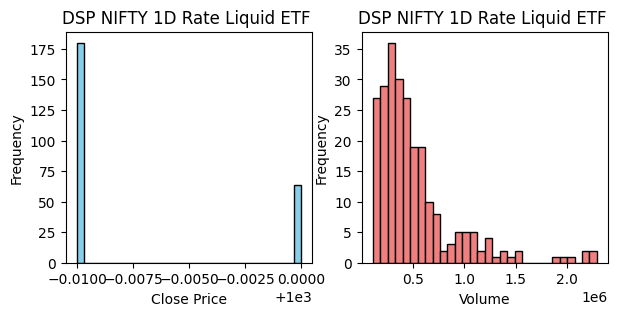

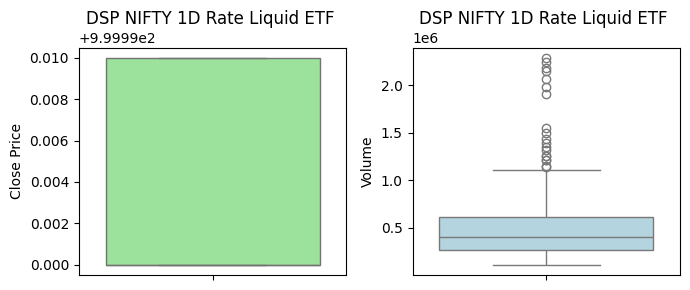

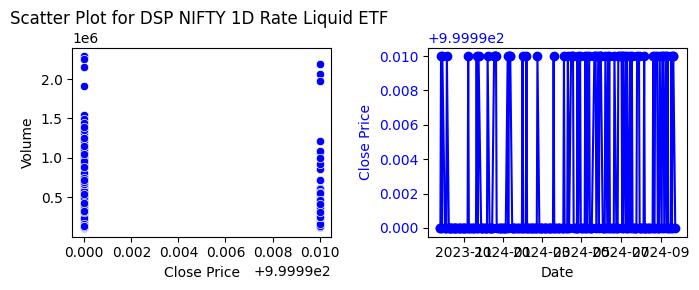

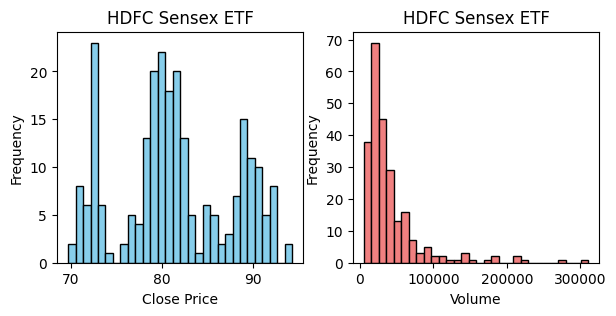

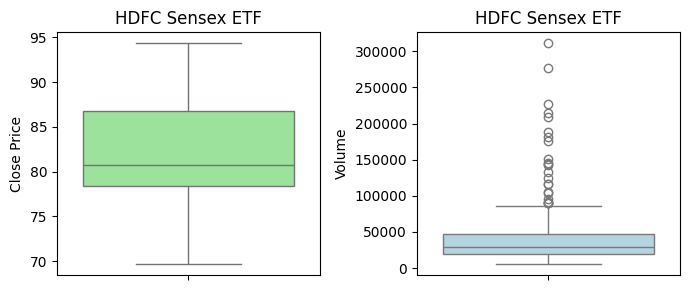

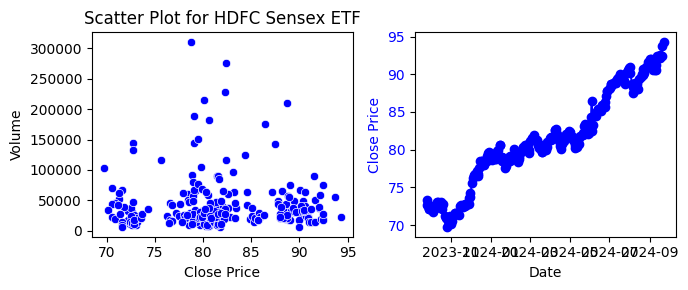

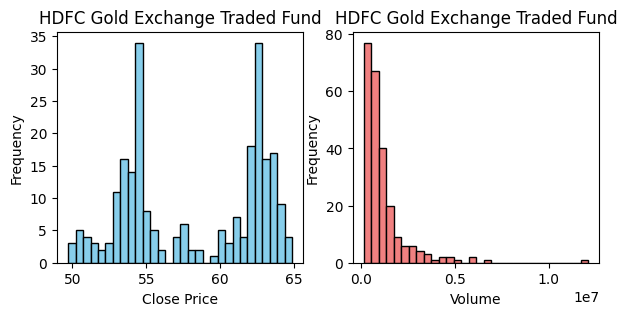

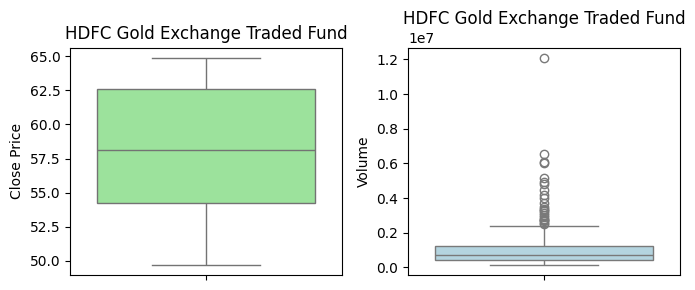

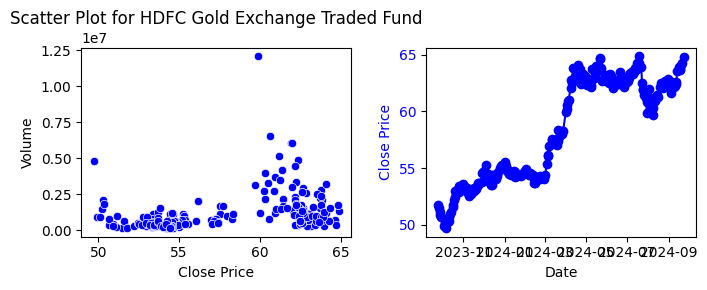

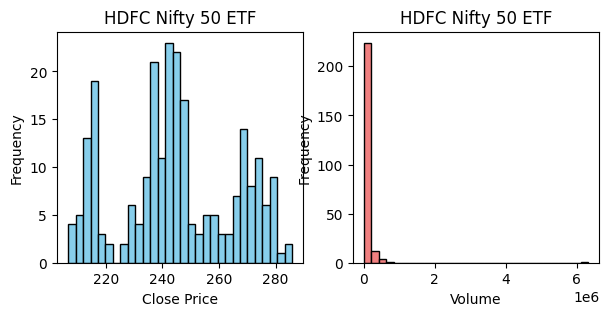

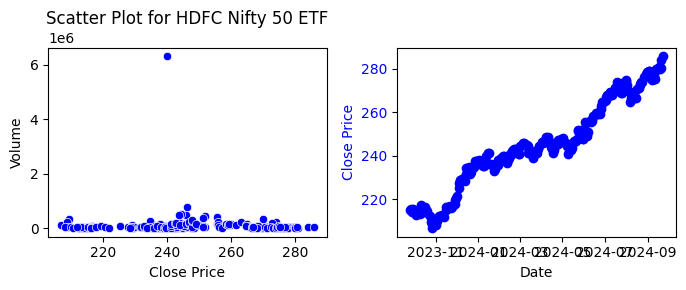

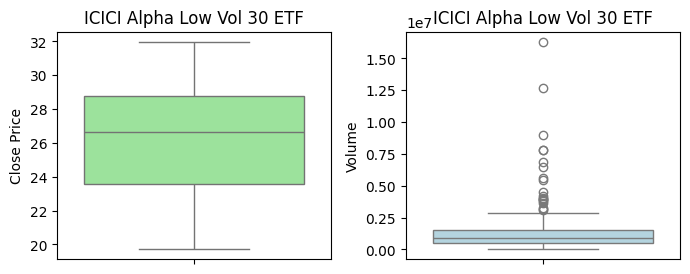

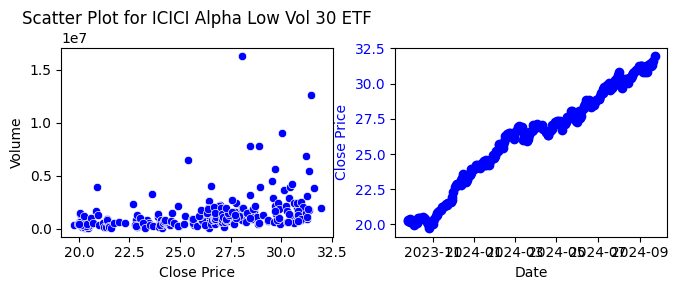

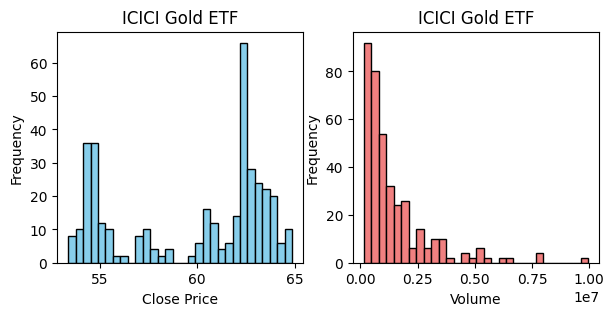

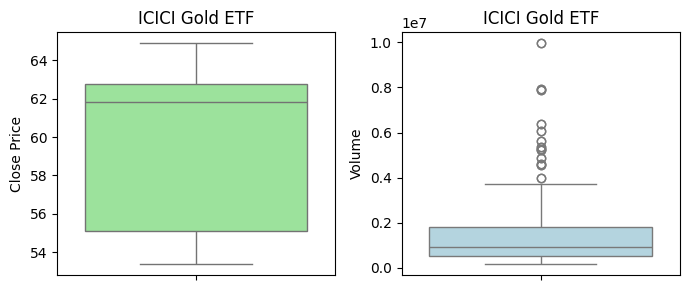

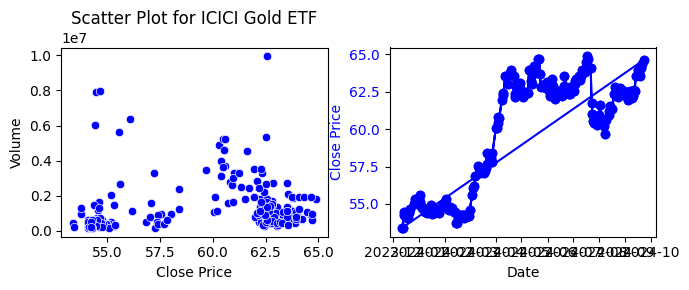

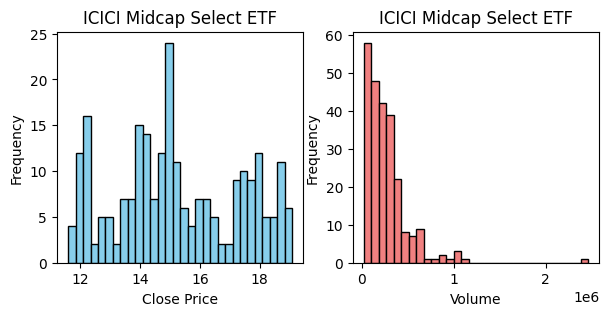

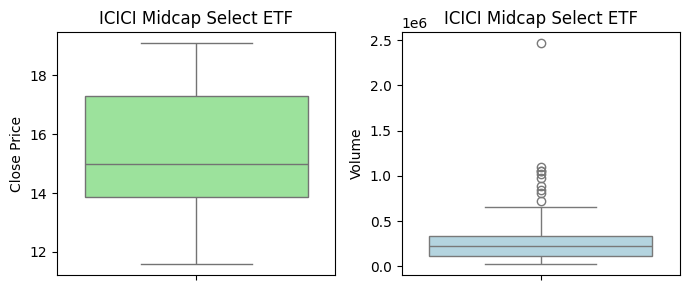

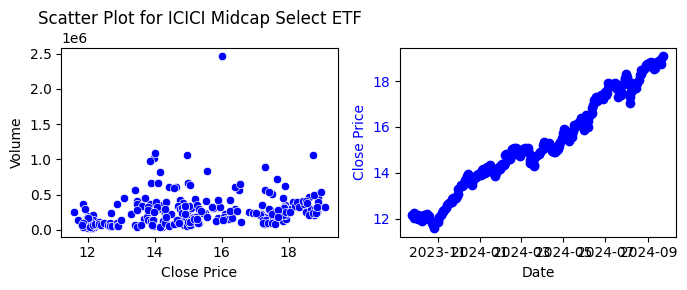

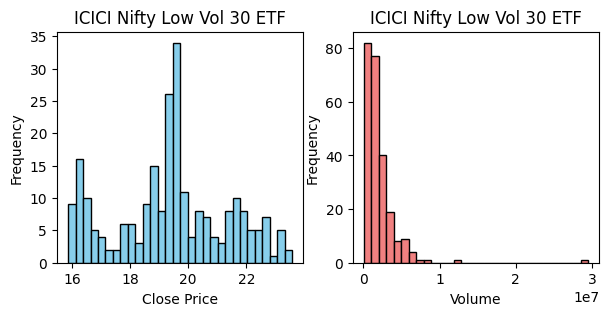

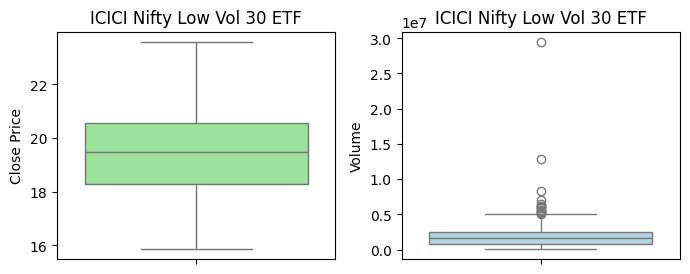

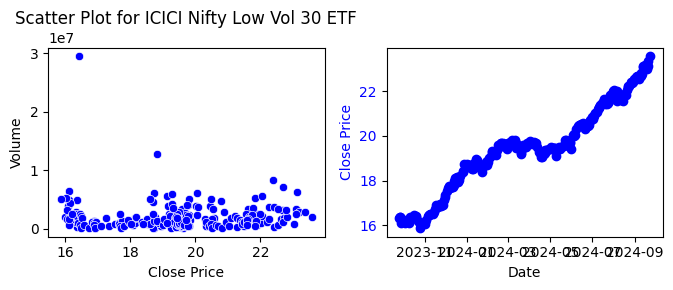

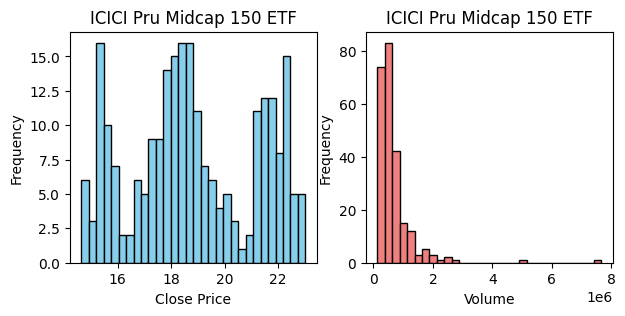

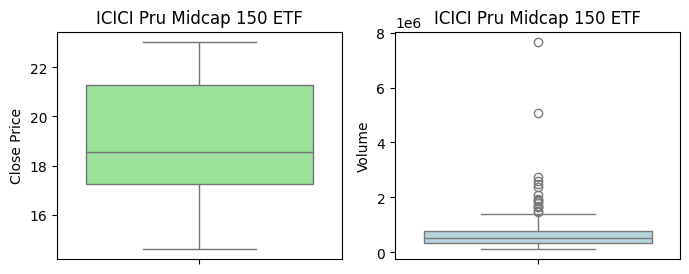

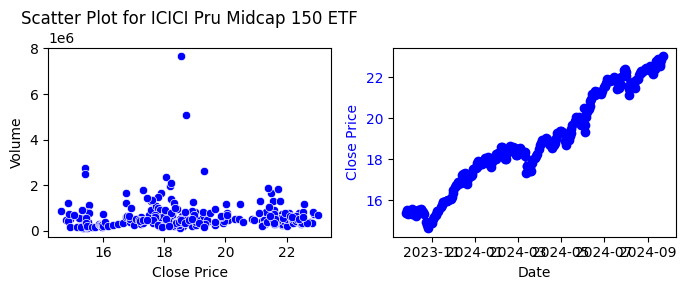

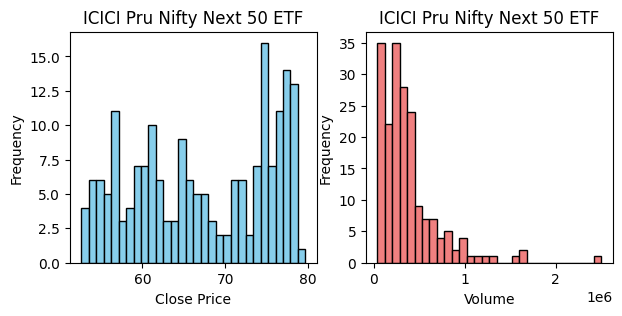

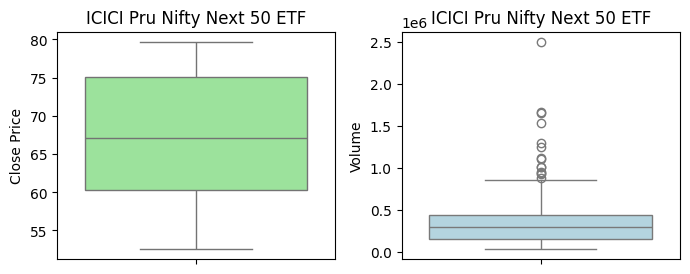

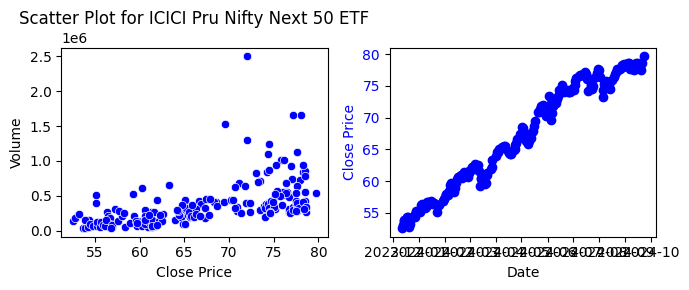

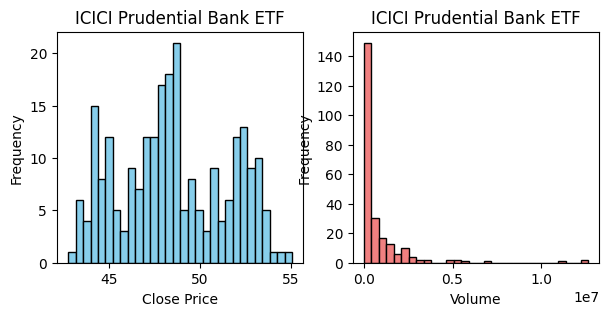

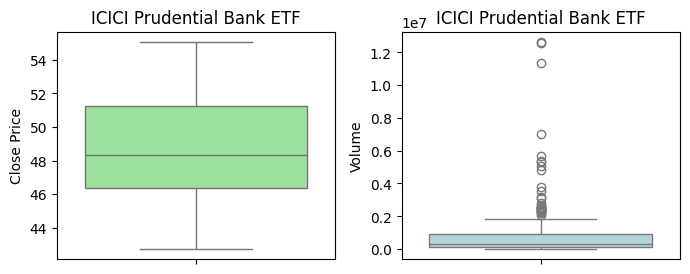

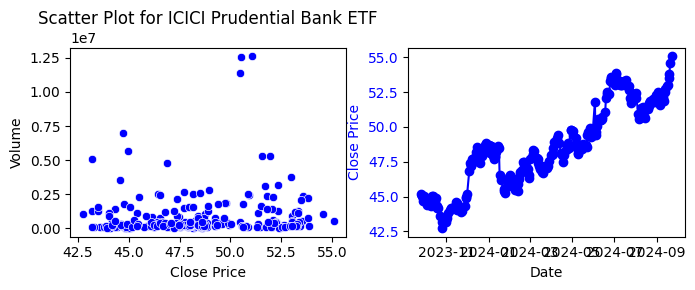

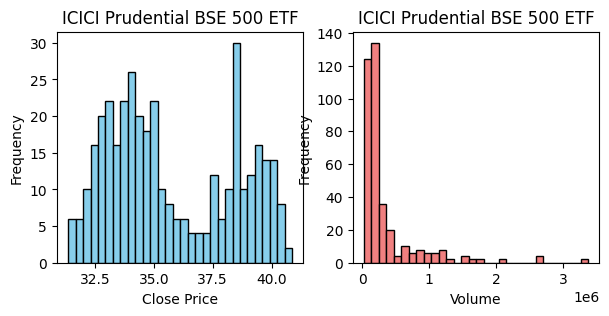

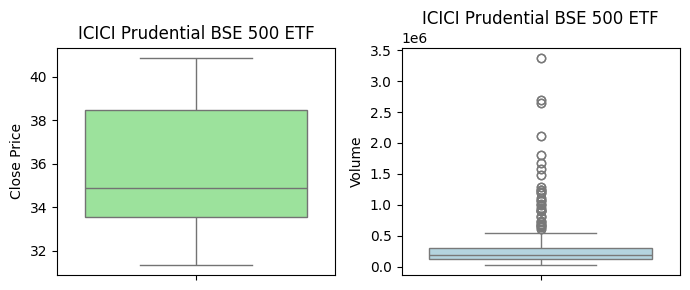

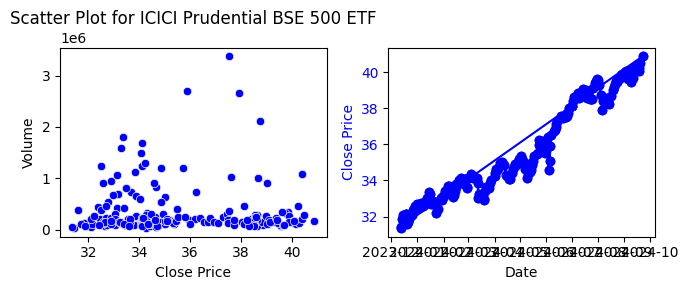

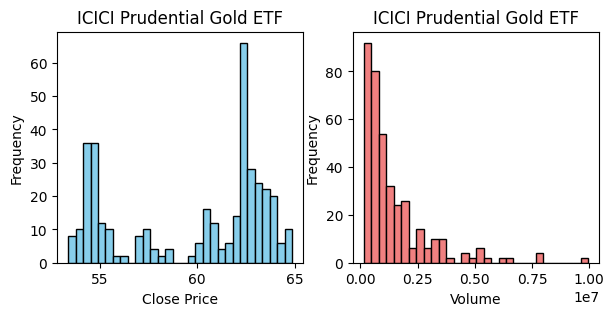

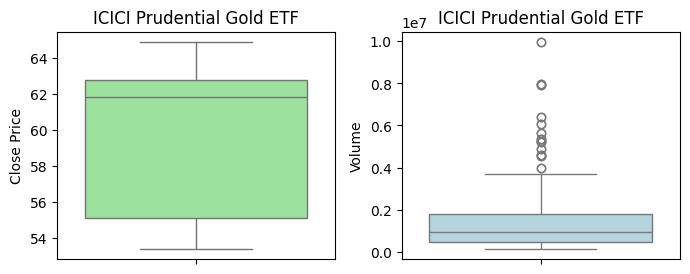

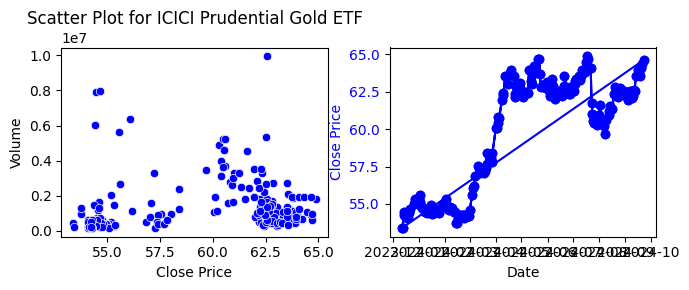

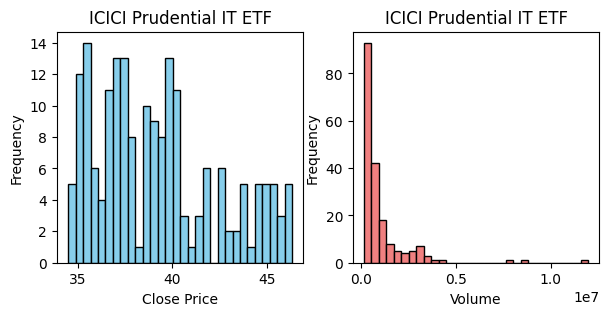

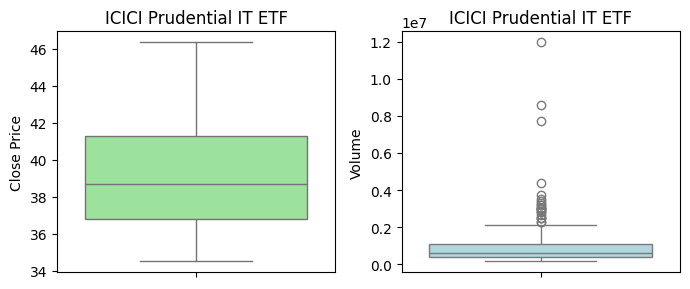

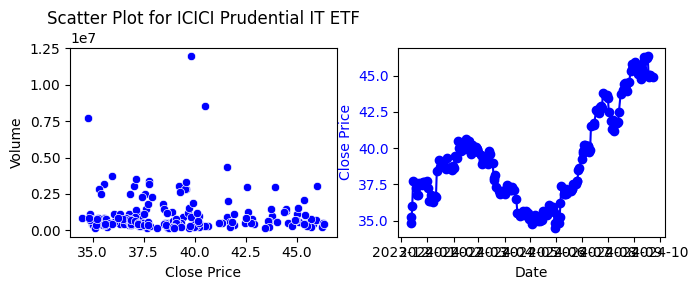

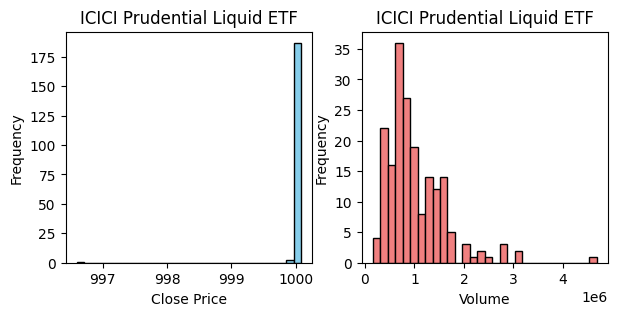

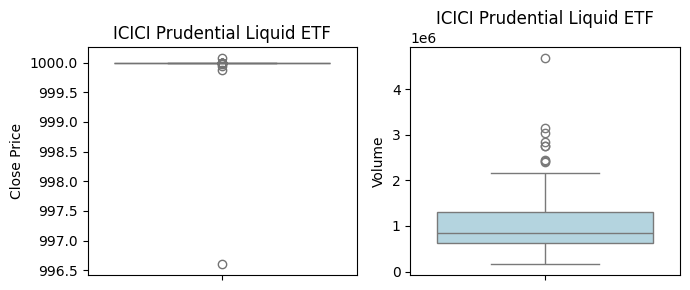

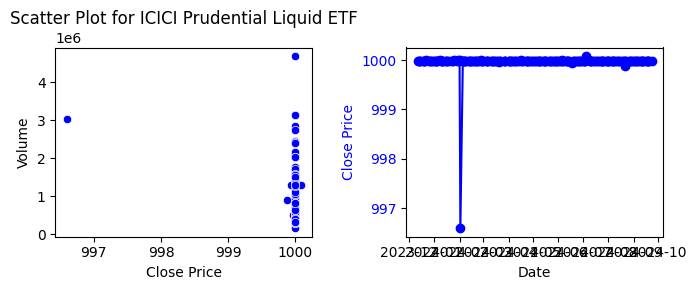

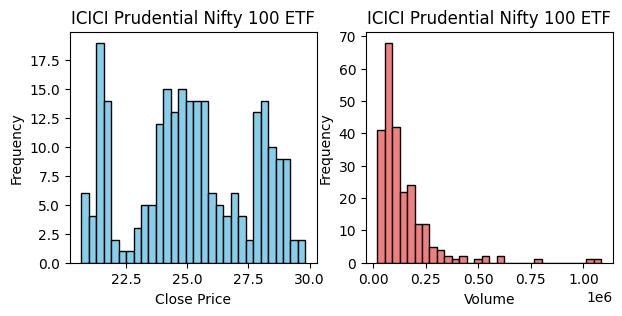

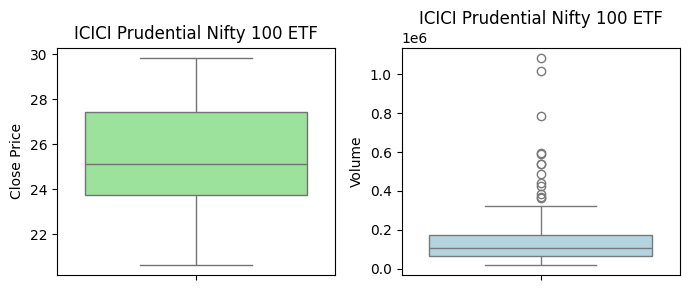

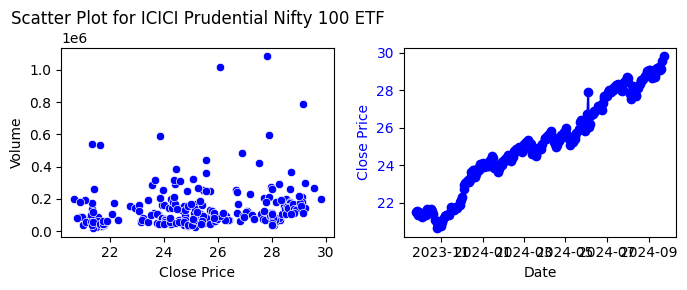

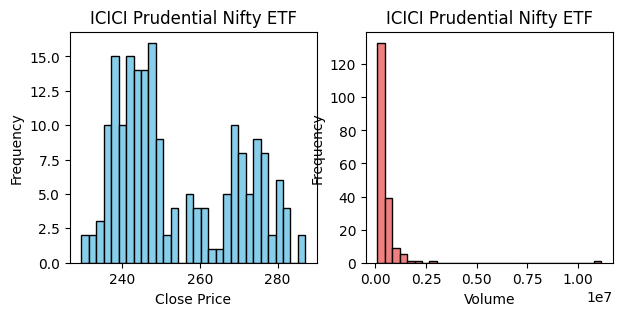

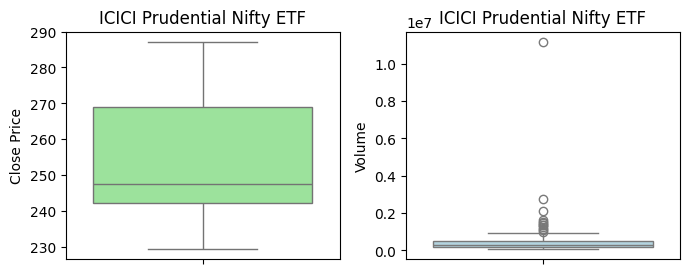

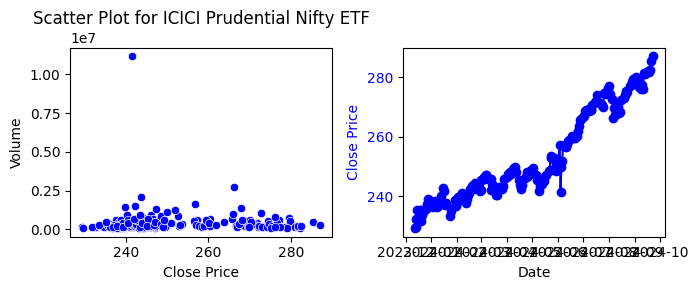

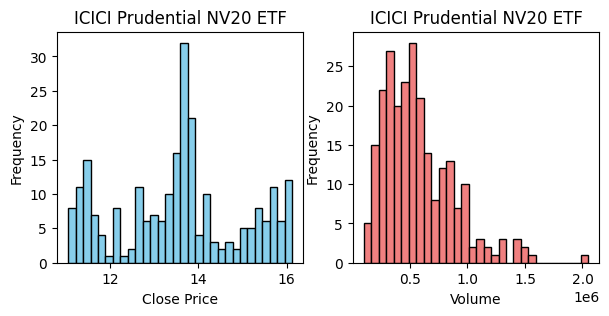

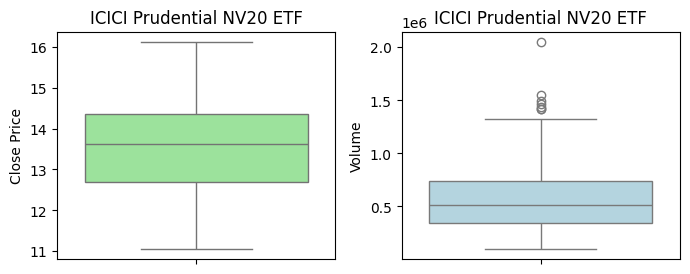

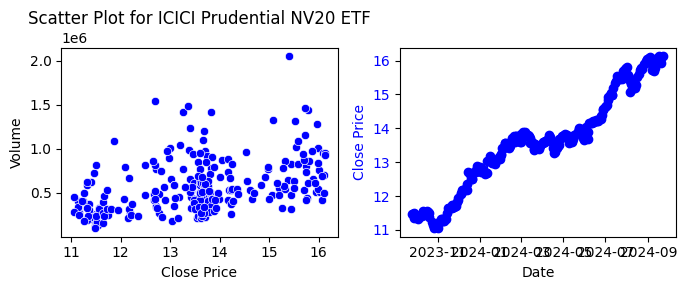

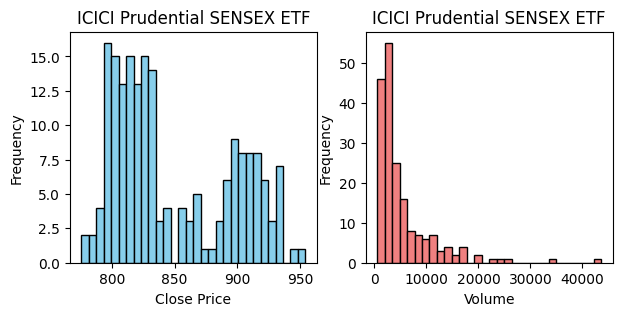

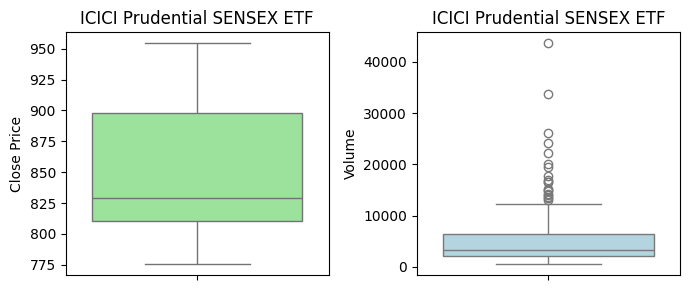

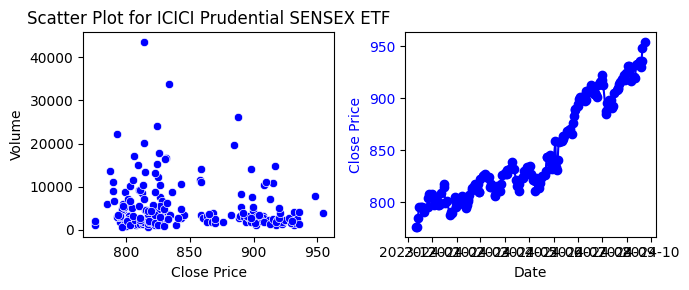

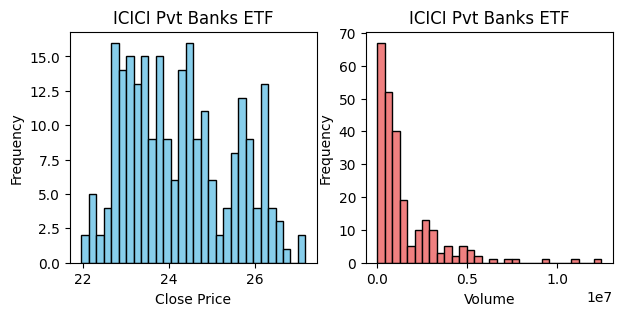

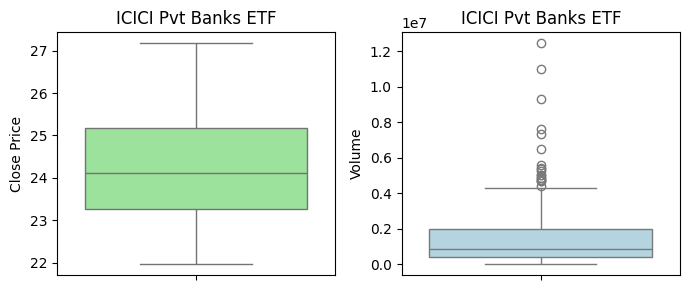

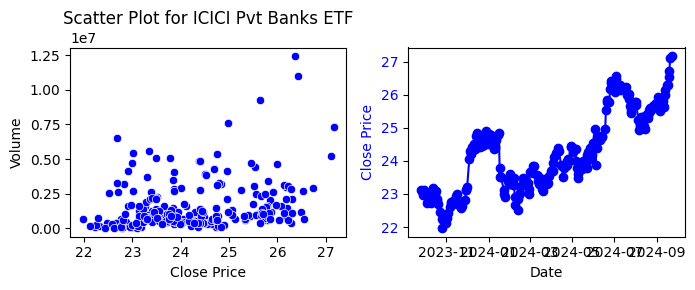

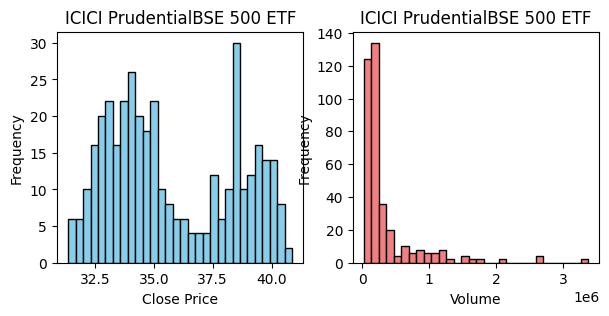

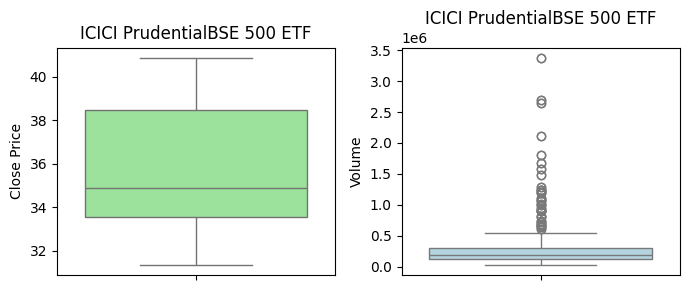

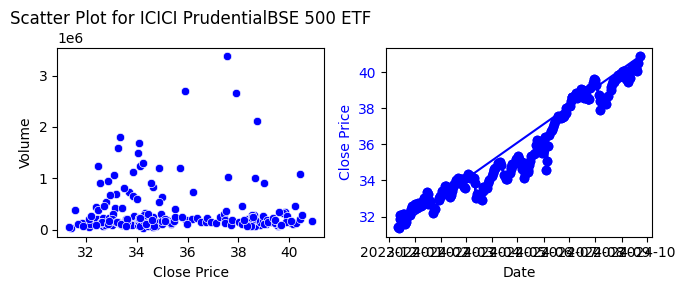

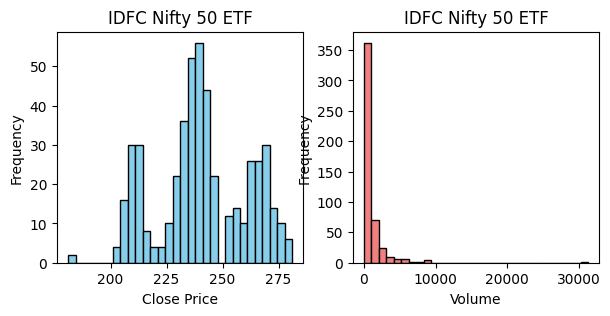

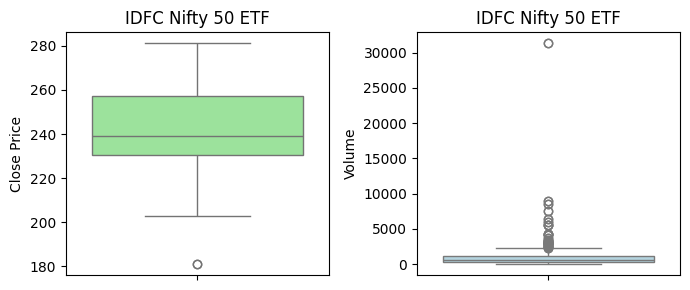

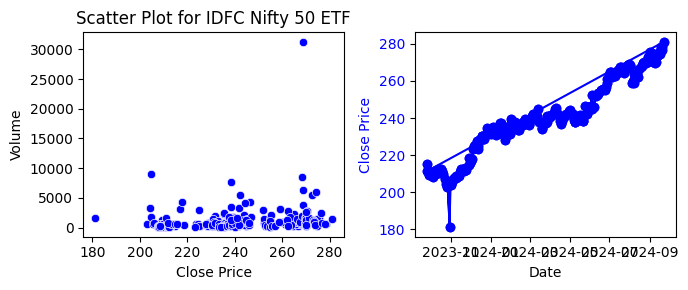

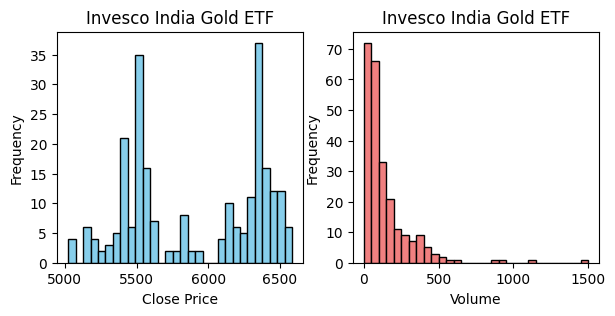

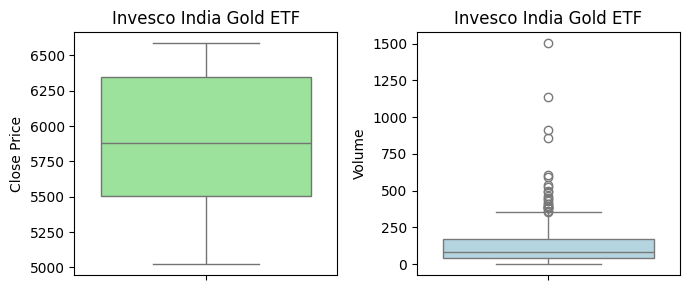

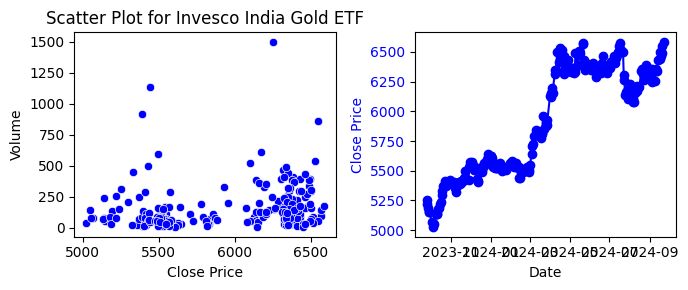

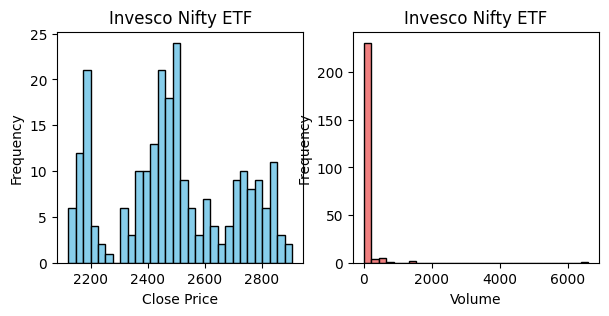

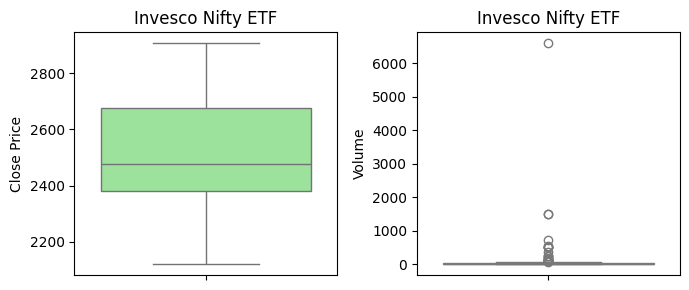

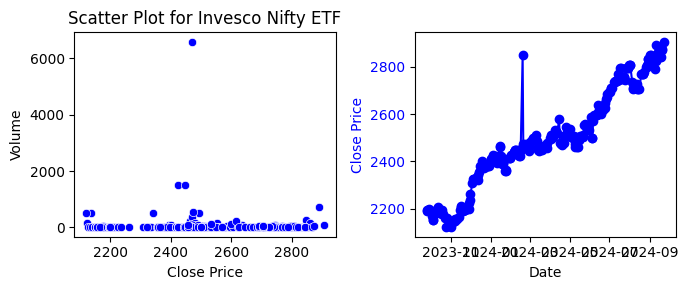

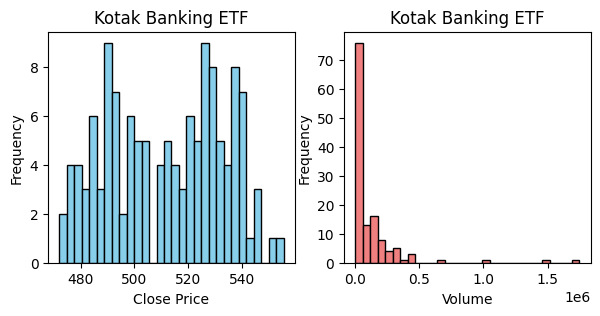

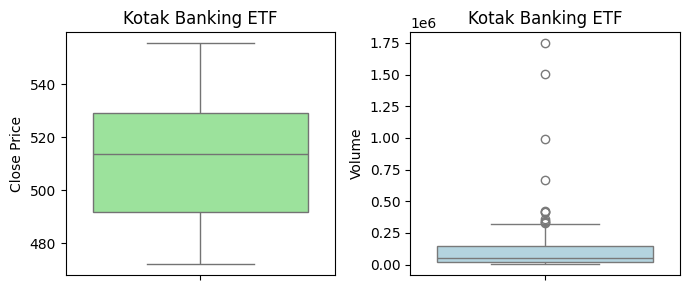

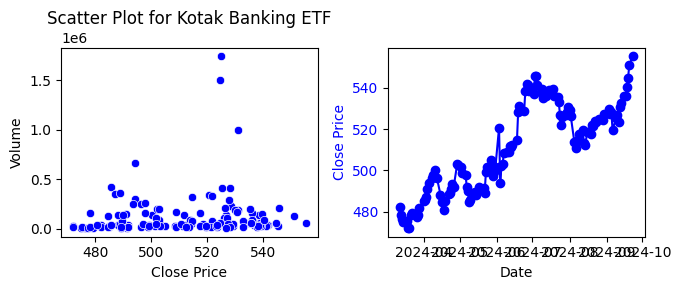

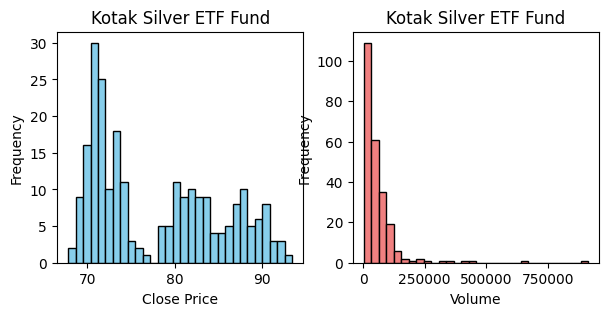

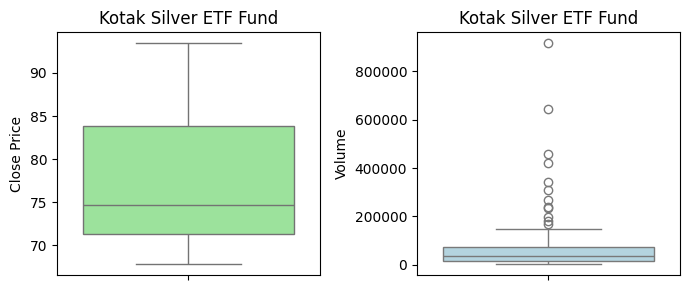

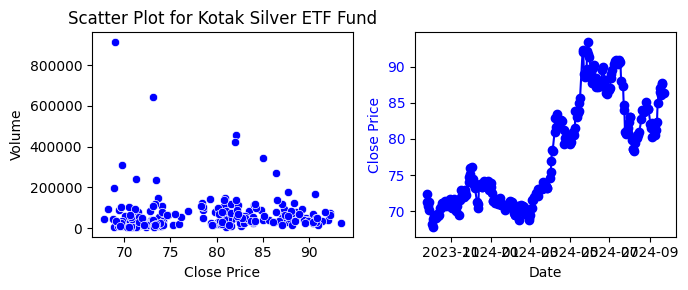

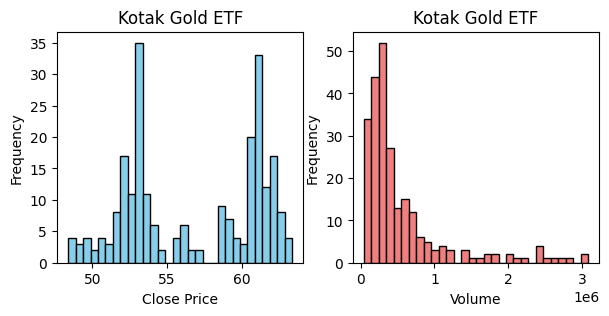

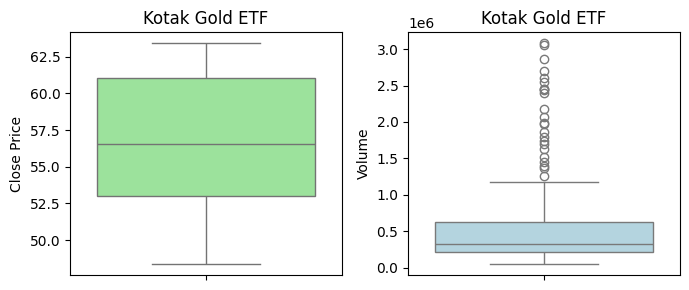

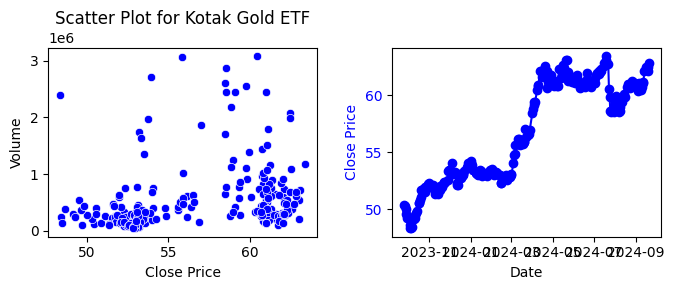

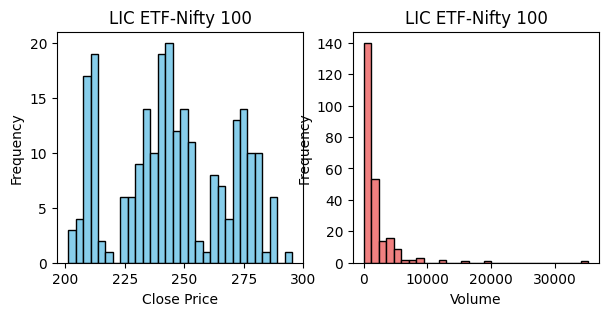

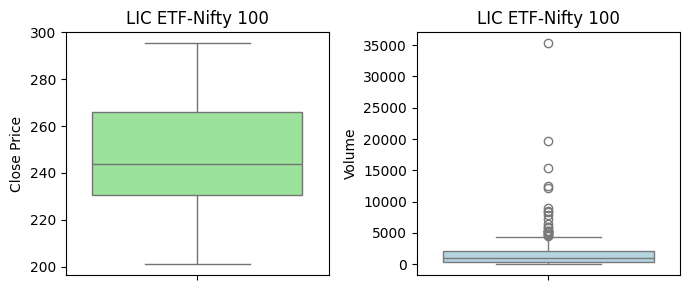

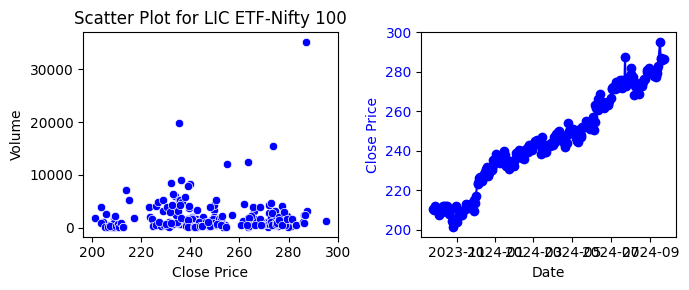

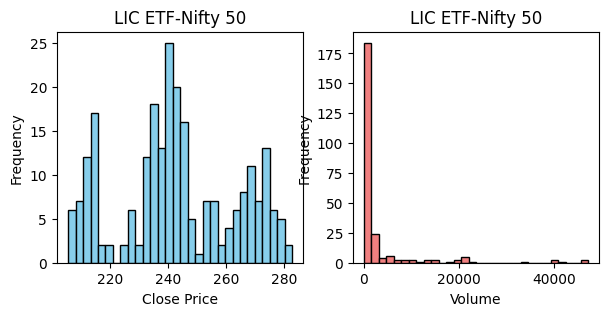

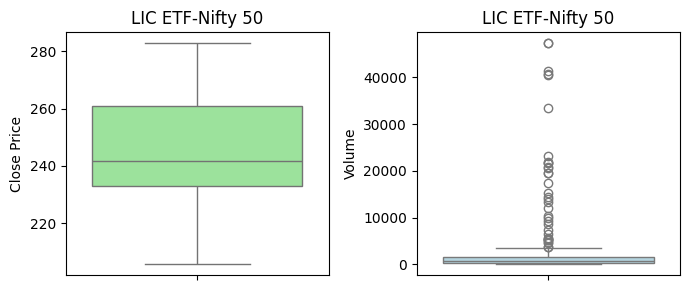

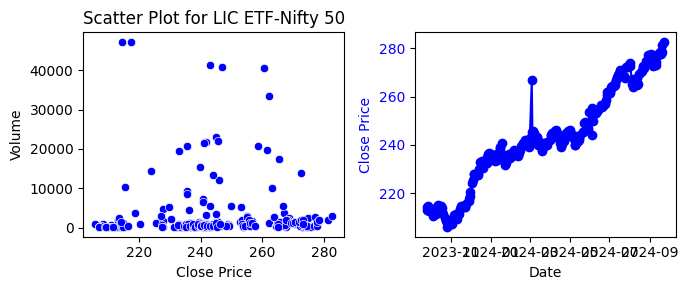

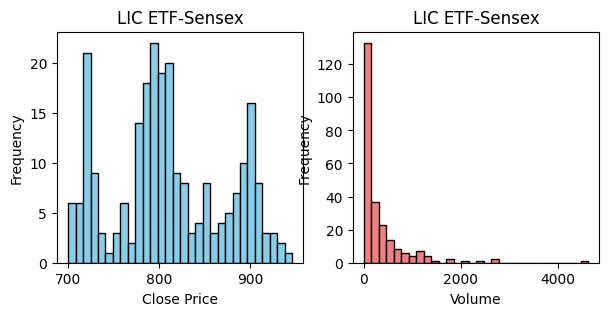

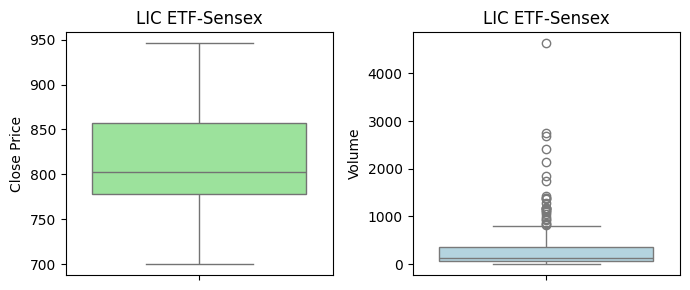

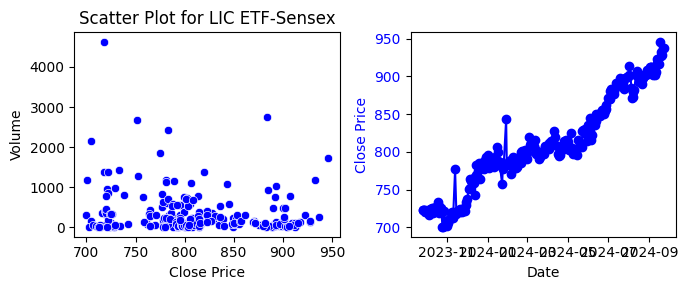

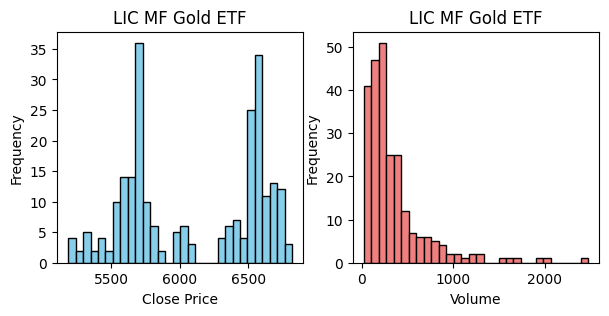

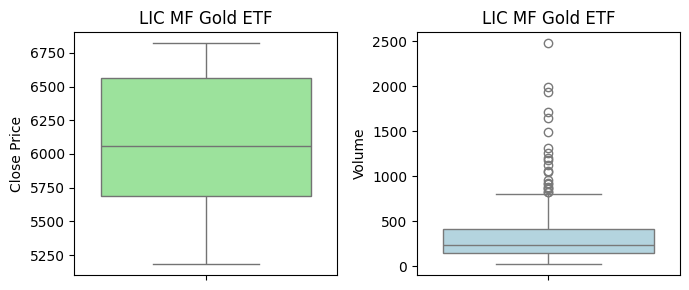

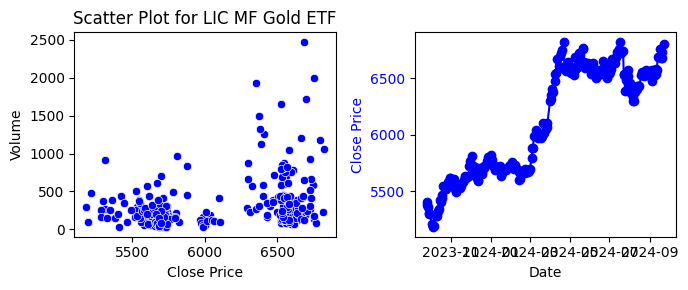

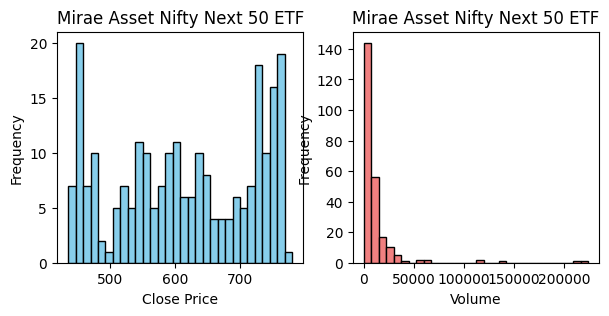

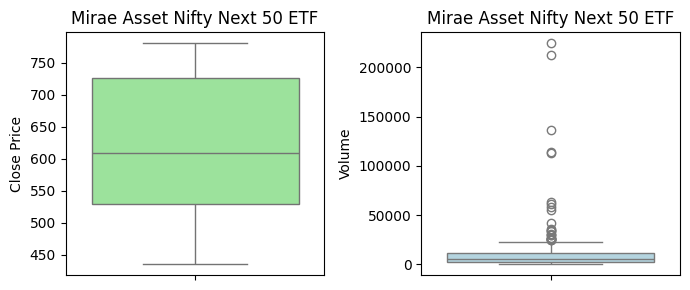

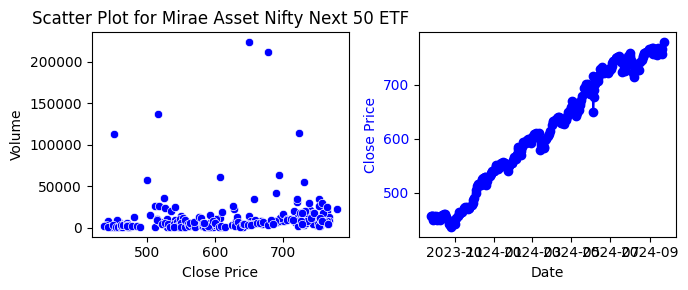

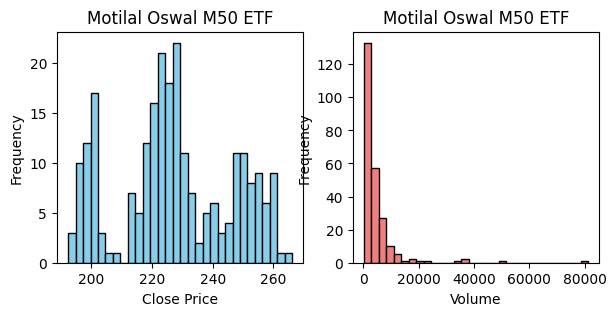

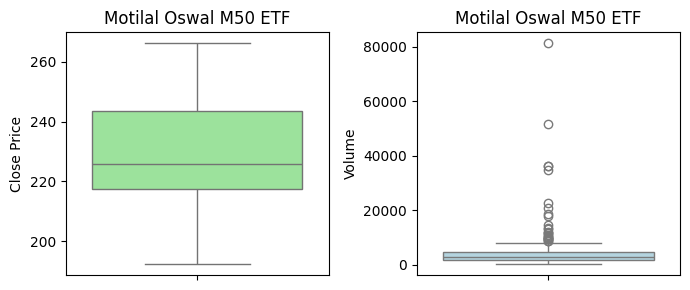

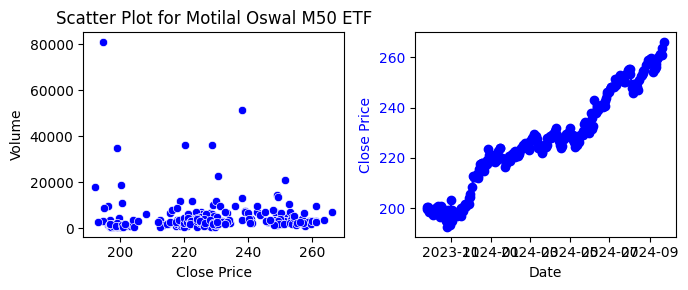

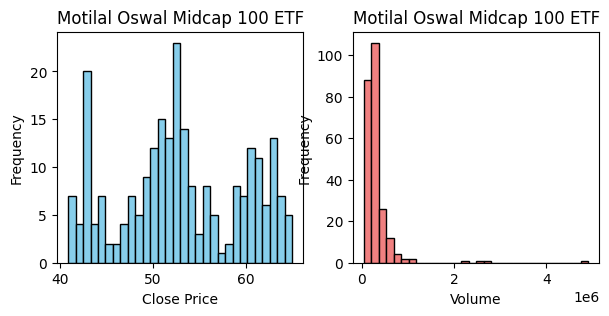

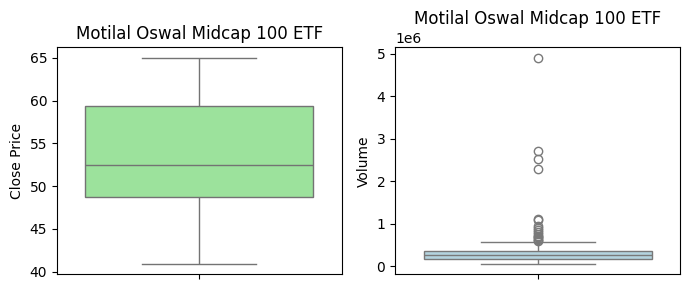

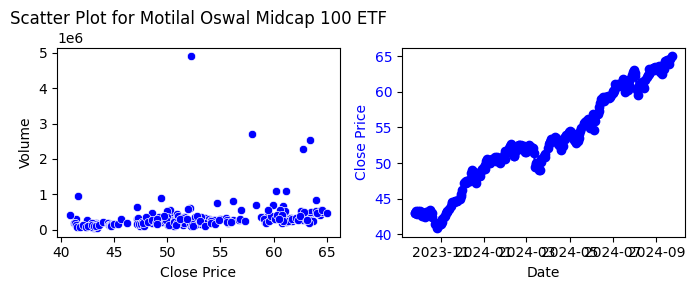

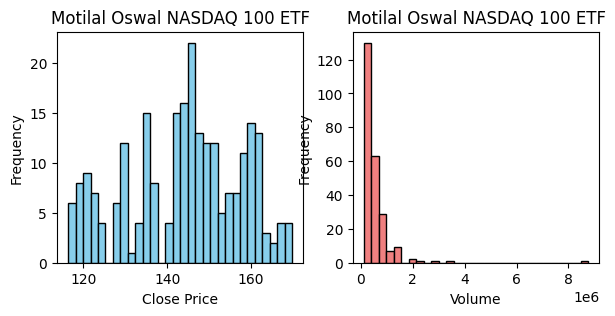

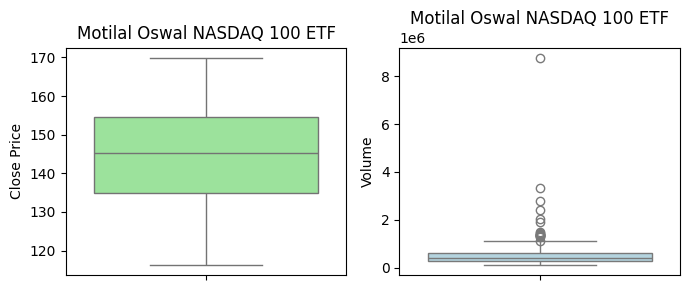

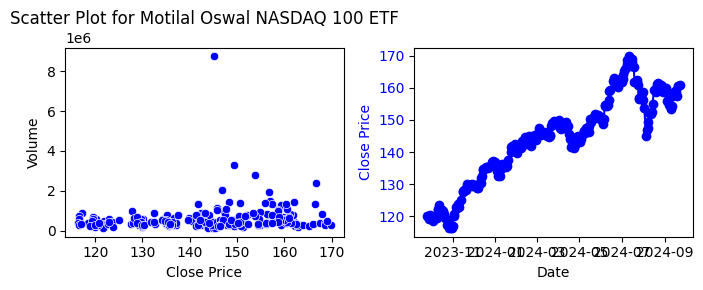

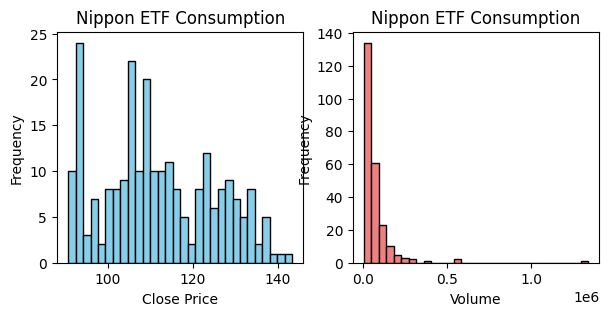

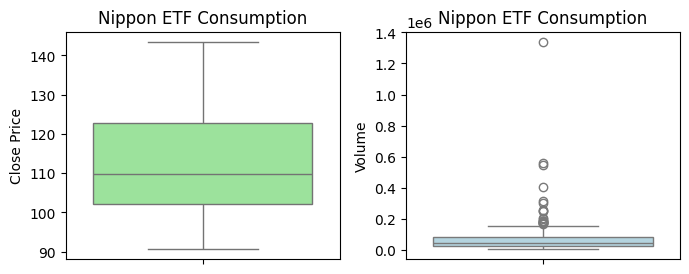

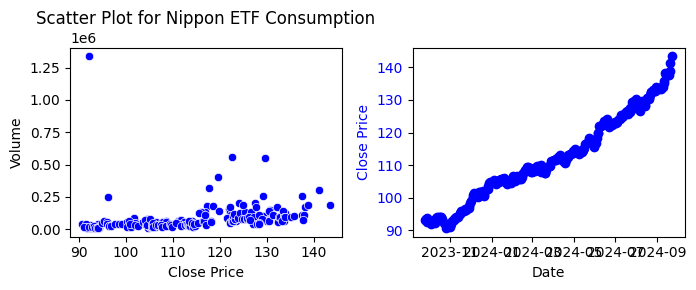

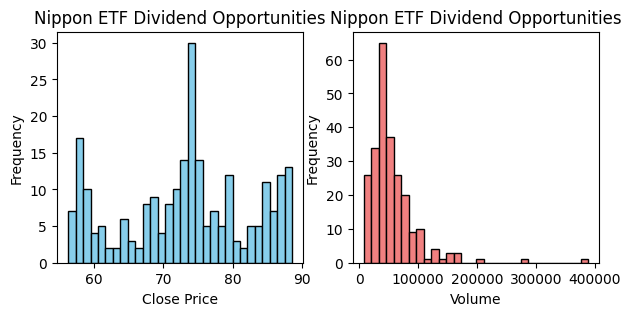

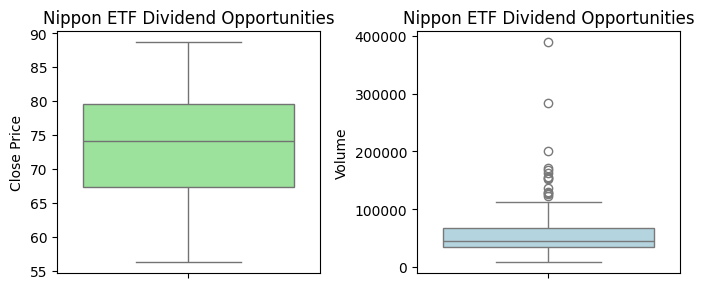

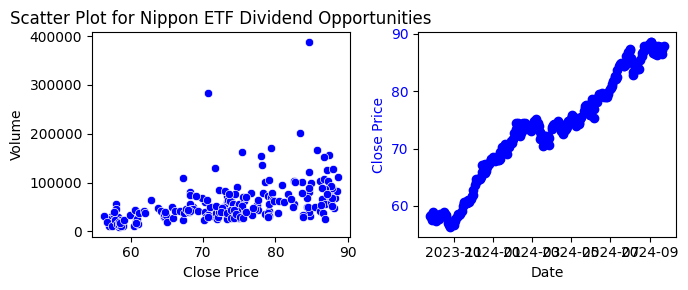

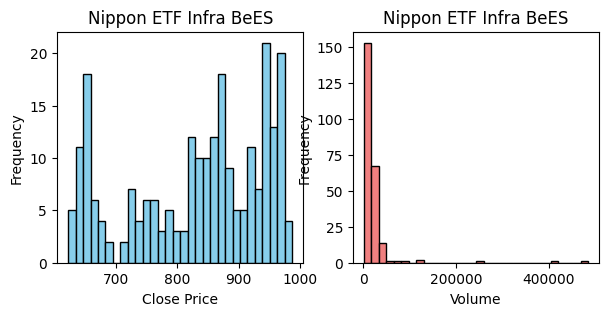

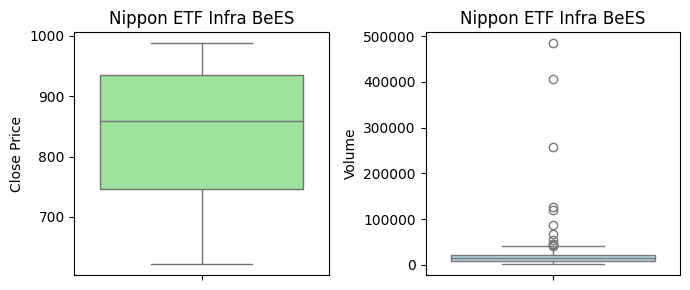

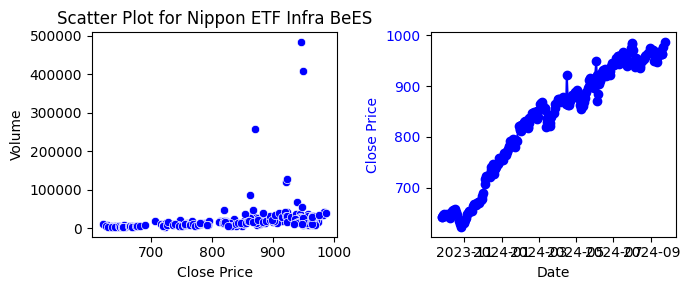

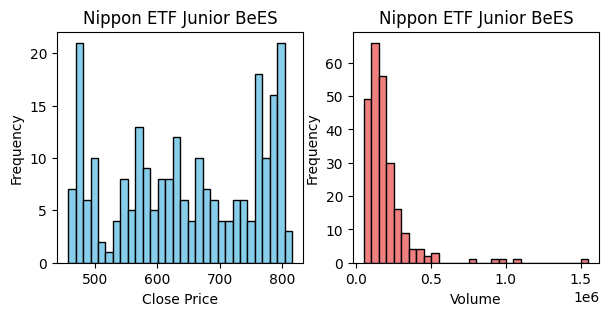

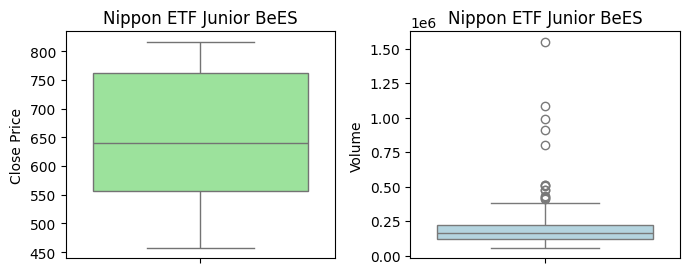

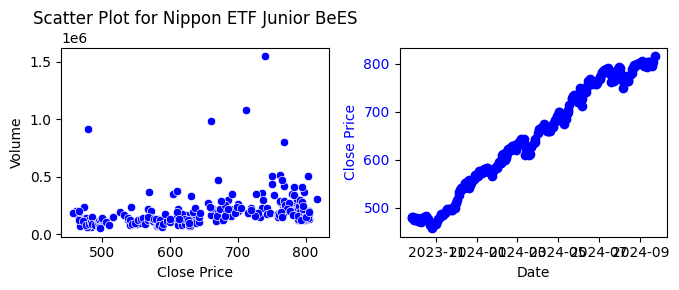

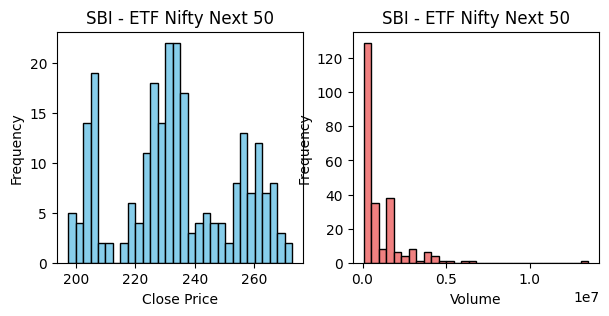

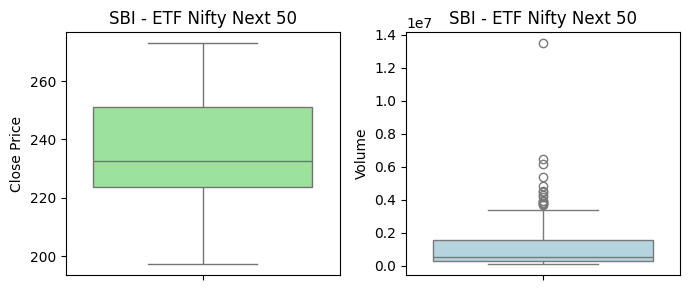

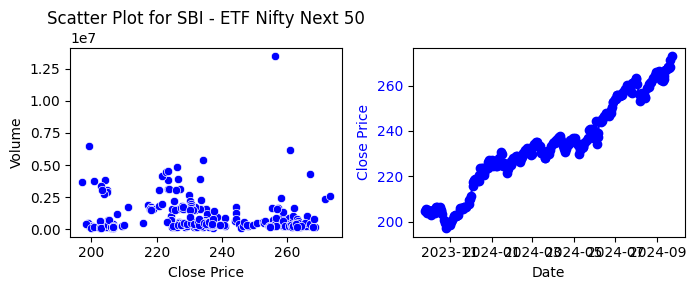

In [10]:
# Data Visualization
# Group by each Ticker
ticker_names = df_raw['Name'].unique()

for ticker in ticker_names:
    ticker_data = df_raw[df_raw['Name'] == ticker]

    # Plot Histogram for Close and Volume
    plt.figure(figsize=(7, 3))

    plt.subplot(1, 2, 1)
    plt.hist(ticker_data['Close'], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'{ticker}')
    plt.xlabel('Close Price')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    plt.hist(ticker_data['Volume'], bins=30, color='lightcoral', edgecolor='black')
    plt.title(f'{ticker}')
    plt.xlabel('Volume')
    plt.ylabel('Frequency')

    #plt.tight_layout()
    #plt.show()

    # Boxplot for Close and Volume
    plt.figure(figsize=(7, 3))

    plt.subplot(1, 2, 1)
    sns.boxplot(y=ticker_data['Close'], color='lightgreen')
    plt.ylabel('Close Price')
    plt.title(f'{ticker}')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=ticker_data['Volume'], color='lightblue')
    plt.ylabel('Volume')
    plt.title(f'{ticker}')

    plt.tight_layout()
    plt.show()

# Boxplot for Close and Volume
    plt.figure(figsize=(7, 3))

    plt.subplot(1, 2, 1)
    sns.scatterplot(x=ticker_data['Close'], y=ticker_data['Volume'], data=ticker_data,color='blue')
    plt.title(f'Scatter Plot for {ticker}')
    plt.xlabel('Close Price')
    plt.ylabel('Volume')

# Lineplot fot Date and Close Price
    plt.subplot(1, 2, 2)
    plt.xlabel('Date')
    plt.ylabel('Close Price', color='blue')
    plt.plot(ticker_data['Date'], ticker_data['Close'], color='blue', label='Close Price', marker='o')
    plt.tick_params(axis='y', labelcolor='blue')

    plt.tight_layout()
    plt.show()




In [11]:
# Feature Addition
# Initialize an empty DataFrame to store the results
df_features = pd.DataFrame()

# Define a function to calculate the percentage change
def calculate_percentage_change(df, months, from_start=True):
    # Sort the data by date for accurate percentage change calculation
    df_sorted = df.sort_index()

    # Approximate number of trading days per month
    trading_days = months * 21

    if from_start:
        # Get the closing price for the first trading day
        first_close_p = df_sorted['Close'].iloc[0]
        first_close_v = df_sorted['Volume'].iloc[0]

        # Get the closing price after the specified number of months from the start
        if len(df_sorted) > trading_days:
            close_after_period_p = df_sorted['Close'].iloc[trading_days]
            p_change = ((close_after_period_p - first_close_p) / first_close_p) * 100
            close_after_period_v = df_sorted['Volume'].iloc[trading_days]
            v_change = ((close_after_period_v - first_close_v) / first_close_v) * 100
        else:
            p_change = None  # Not enough data to calculate percentage change
            v_change = None  # Not enough data to calculate percentage change
    else:
        # Get the closing price for the last trading day
        last_close_p = df_sorted['Close'].iloc[-1]
        last_close_v = df_sorted['Volume'].iloc[-1]

        # Get the closing price for the day n months before the last trading day
        if len(df_sorted) > trading_days:
            close_before_period_p = df_sorted['Close'].iloc[-trading_days-1]
            p_change = ((last_close_p - close_before_period_p) / close_before_period_p) * 100
            close_before_period_v = df_sorted['Volume'].iloc[-trading_days-1]
            v_change = ((last_close_v - close_before_period_v) / close_before_period_v) * 100
        else:
            p_change = None  # Not enough data to calculate percentage change
            v_change = None  # Not enough data to calculate percentage change

    return p_change,v_change

# Loop through each unique ticker in the raw data
for ticker in df_raw['Ticker'].unique():
    # Filter the data for the current ticker
    df_ticker = df_raw[df_raw['Ticker'] == ticker]

    # Calculate percentage changes from the start of the data
    p_change_1m_start, v_change_1m_start = calculate_percentage_change(df_ticker, 1, from_start=True)
    p_change_3m_start, v_change_3m_start = calculate_percentage_change(df_ticker, 3, from_start=True)
    p_change_6m_start, v_change_6m_start = calculate_percentage_change(df_ticker, 6, from_start=True)

    # Calculate percentage changes from the last trading day
    p_change_1m_end, v_change_1m_end = calculate_percentage_change(df_ticker, 1, from_start=False)
    p_change_3m_end, v_change_3m_end = calculate_percentage_change(df_ticker, 3, from_start=False)
    p_change_6m_end, v_change_6m_end = calculate_percentage_change(df_ticker, 6, from_start=False)

    # Append the results to df_features
    df_ticker_features = pd.DataFrame({
        'Ticker': [ticker],
        'First_1m_p_change': [p_change_1m_start],
        'First_1m_v_change': [v_change_1m_start],
        'First_3m_p_change': [p_change_3m_start],
        'First_3m_v_change': [v_change_3m_start],
        'First_6m_p_change': [p_change_6m_start],
        'First_6m_v_change': [v_change_6m_start],
        'Last_1m_p_change': [p_change_1m_end],
        'Last_1m_v_change': [v_change_1m_end],
        'Last_3m_p_change': [p_change_3m_end],
        'Last_3m_v_change': [v_change_3m_end],
        'Last_6m_p_change': [p_change_6m_end],
        'Last_6m_v_change': [v_change_6m_end]
    })

    # Use pd.concat to add the ticker's data to df_features
    df_features = pd.concat([df_features, df_ticker_features], ignore_index=True)

# Display the df_features DataFrame
df_features.head()
df_features.shape

# Optionally, save df_features to a CSV file
df_features.to_csv("df_features.csv", index=False)

In [12]:
df_features.head()

Ticker  First_1m_p_change  First_1m_v_change  First_3m_p_change  \
0     CPSEETF.NS          -0.726579         198.625683          28.661572   
1    AXISGOLD.NS           2.832806         187.763111           6.933439   
2   AXISNIFTY.NS          -3.791900         353.197218          10.466768   
3  IDFNIFTYET.NS          -3.965552         100.763359          10.505393   
4    ICICIB22.NS          -2.798238         -23.520258          22.533128   

   First_3m_v_change  First_6m_p_change  First_6m_v_change  Last_1m_p_change  \
0         674.370246          57.724664         286.341161         -2.764483   
1         126.328933          17.036455          64.701354          3.850584   
2          25.667489          14.343868          64.034104          4.433774   
3          10.687023          14.224871          91.984733          4.037452   
4          80.769078          38.251438         -24.608599          0.468566   

   Last_1m_v_change  Last_3m_p_change  Last_3m_v_change  Last_6m_p_change  \
0        146.143921          6.414368         12.964076         30.049647   
1         41.869582          1.790324         80.456688         12.999109   
2         20.805124         10.366672        -28.657878         18.257313   
3        553.424658         10.242740         21.374046         18.370528   
4         19.261977          6.936889          9.064200         21.302200   

   Last_6m_v_change  
0          7.402814  
1        227.894692  
2        -46.150082  
3        508.936170  
4        -25.009817

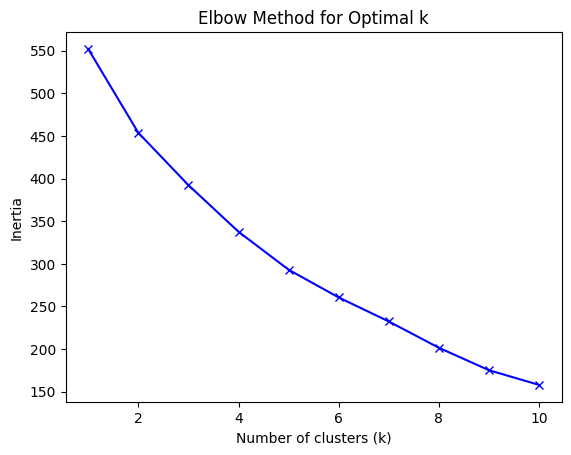

In [13]:
# Modeling
# Dropping 'Ticker' for modeling
X = df_features.drop(columns=['Ticker'])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow method to find optimal k
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.plot(k_range, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [14]:
# Let's assume from the elbow method, we find that 3 is the optimal number of clusters
optimal_k = 3

# Apply K-Means clustering with the optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_features['Cluster_Label'] = kmeans.fit_predict(X_scaled)

# Show dataframe with cluster labels
df_features.head()

Ticker  First_1m_p_change  First_1m_v_change  First_3m_p_change  \
0     CPSEETF.NS          -0.726579         198.625683          28.661572   
1    AXISGOLD.NS           2.832806         187.763111           6.933439   
2   AXISNIFTY.NS          -3.791900         353.197218          10.466768   
3  IDFNIFTYET.NS          -3.965552         100.763359          10.505393   
4    ICICIB22.NS          -2.798238         -23.520258          22.533128   

   First_3m_v_change  First_6m_p_change  First_6m_v_change  Last_1m_p_change  \
0         674.370246          57.724664         286.341161         -2.764483   
1         126.328933          17.036455          64.701354          3.850584   
2          25.667489          14.343868          64.034104          4.433774   
3          10.687023          14.224871          91.984733          4.037452   
4          80.769078          38.251438         -24.608599          0.468566   

   Last_1m_v_change  Last_3m_p_change  Last_3m_v_change  Last_6m_p_change  \
0        146.143921          6.414368         12.964076         30.049647   
1         41.869582          1.790324         80.456688         12.999109   
2         20.805124         10.366672        -28.657878         18.257313   
3        553.424658         10.242740         21.374046         18.370528   
4         19.261977          6.936889          9.064200         21.302200   

   Last_6m_v_change  Cluster_Label  
0          7.402814              0  
1        227.894692              2  
2        -46.150082              0  
3        508.936170              0  
4        -25.009817              0

Accuracy: 0.7142857142857143

Classification Report:
               precision    recall  f1-score   support

           0       0.73      1.00      0.84         8
           1       0.00      0.00      0.00         3
           2       1.00      0.67      0.80         3

    accuracy                           0.71        14
   macro avg       0.58      0.56      0.55        14
weighted avg       0.63      0.71      0.65        14



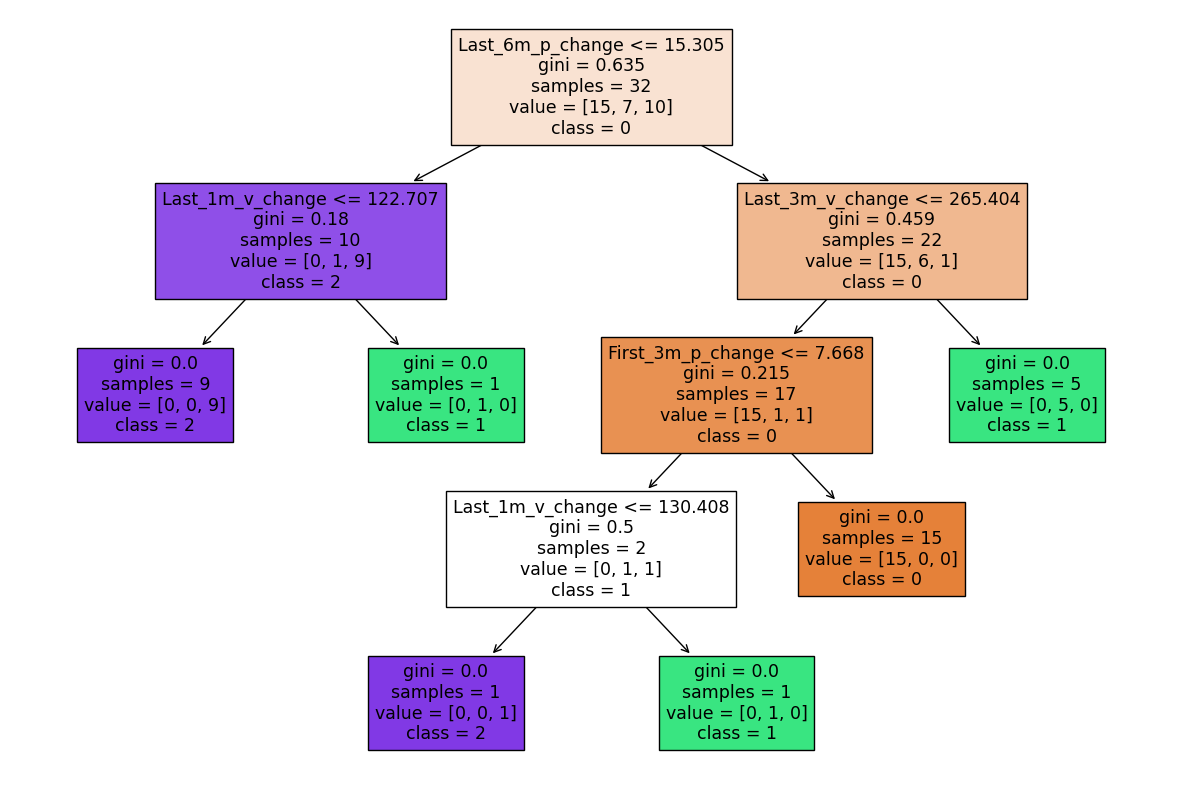

In [15]:
# Feature columns and target
X = df_features.drop(columns=['Ticker', 'Cluster_Label'])
y = df_features['Cluster_Label']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Train Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict on test set
y_pred = dt.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot the Decision Tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt, feature_names=X.columns, class_names=[str(i) for i in range(optimal_k)], filled=True)
plt.show()

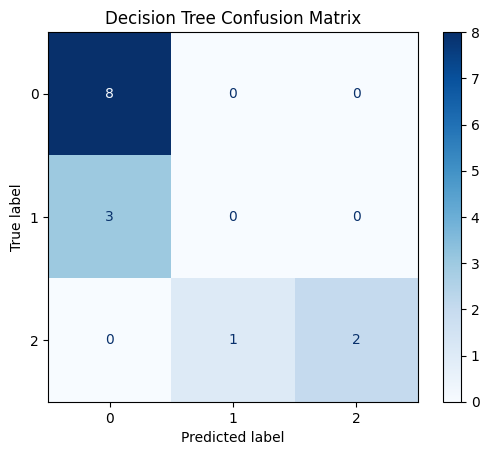

In [16]:
    ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)).plot(cmap=plt.cm.Blues)
    plt.title('Decision Tree Confusion Matrix')
    plt.show()

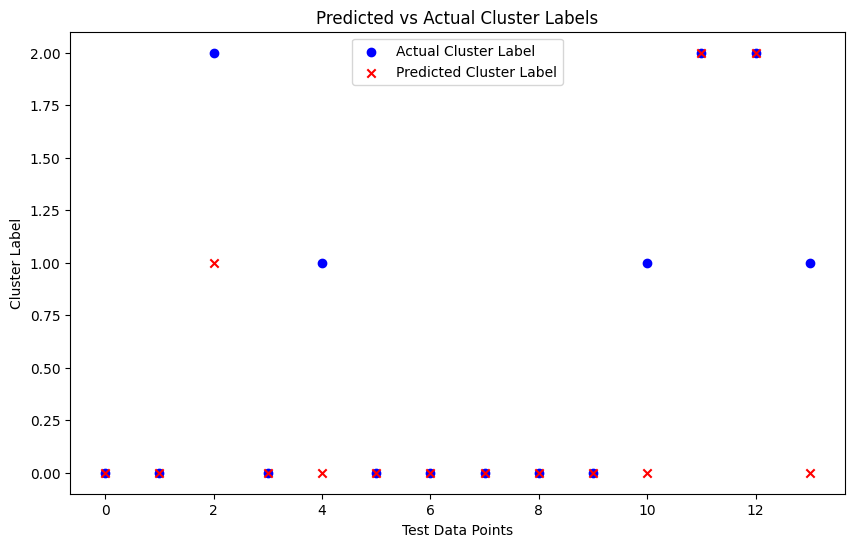

In [17]:
# Plot Predicted vs Actual Cluster Labels
plt.figure(figsize=(10, 6))

# X-axis values (test indices)
test_indices = np.arange(len(y_test))

# Plot actual labels
plt.scatter(test_indices, y_test, color='blue', label='Actual Cluster Label')

# Plot predicted labels
plt.scatter(test_indices, y_pred, color='red', marker='x', label='Predicted Cluster Label')

plt.title('Predicted vs Actual Cluster Labels')
plt.xlabel('Test Data Points')
plt.ylabel('Cluster Label')
plt.legend()
plt.show()

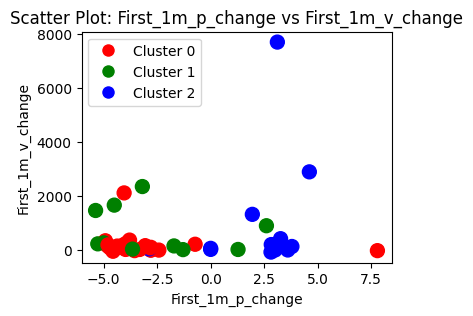

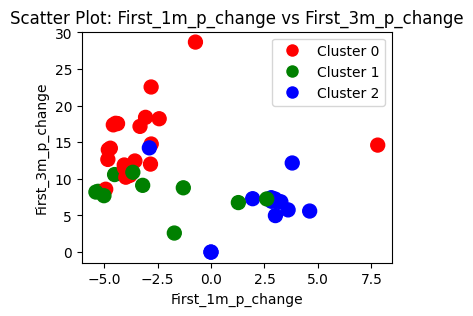

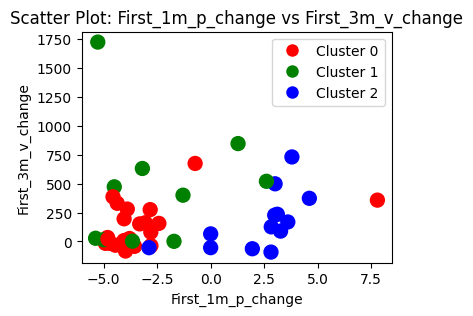

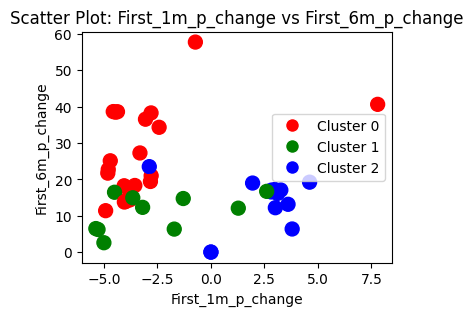

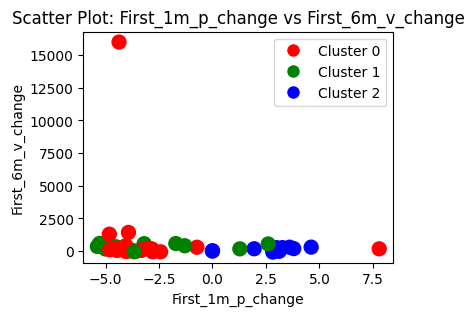

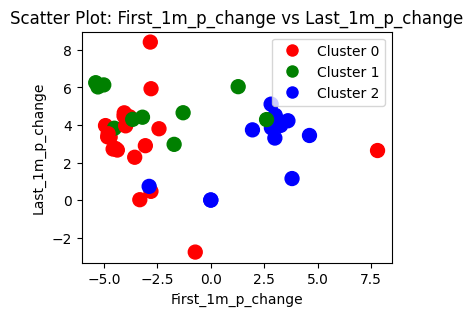

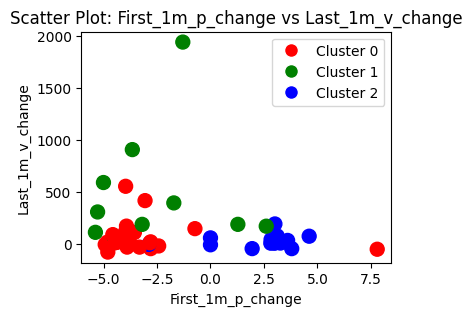

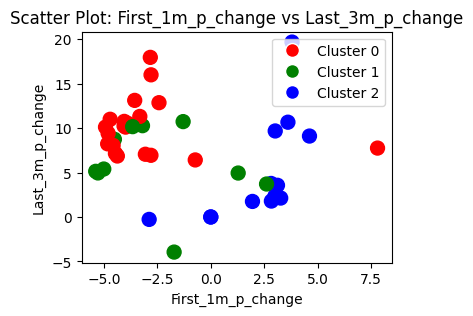

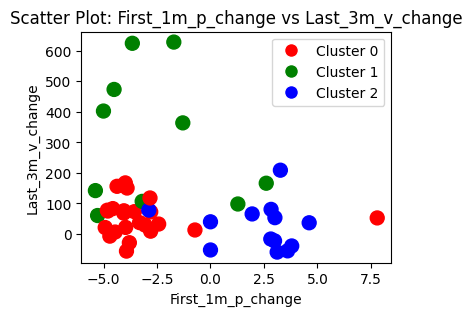

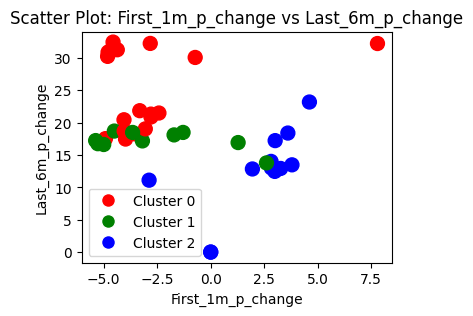

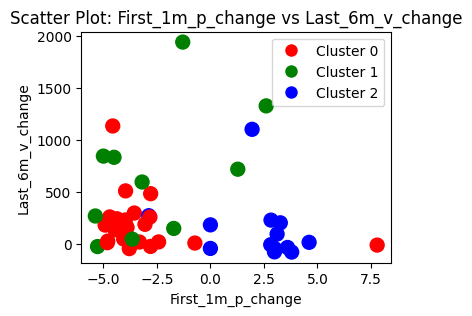

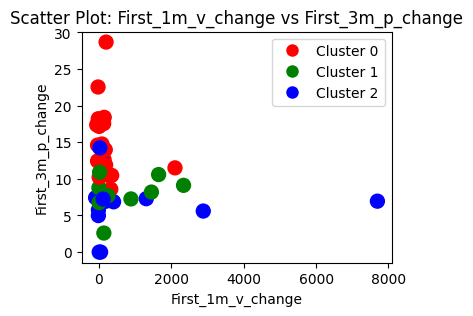

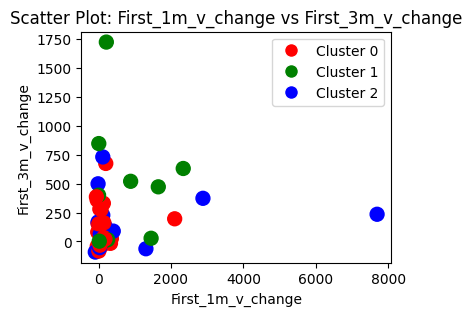

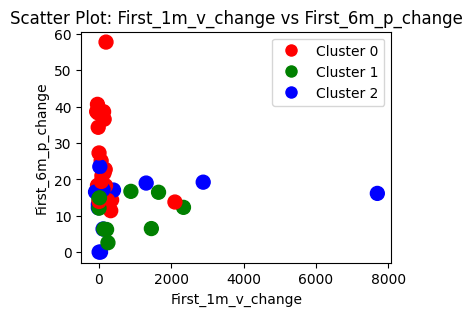

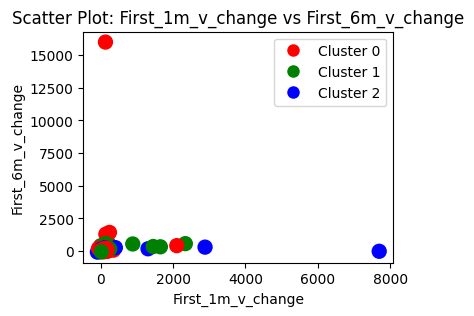

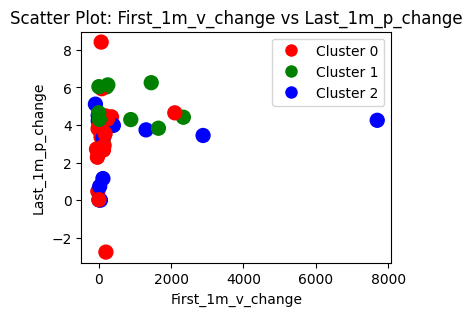

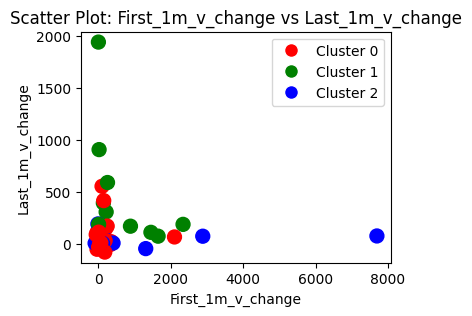

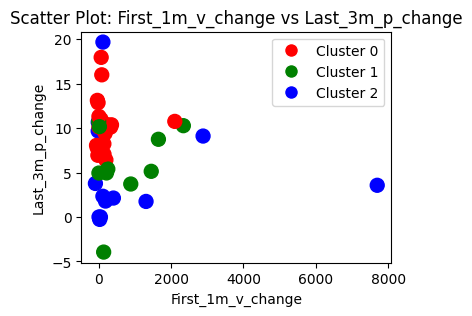

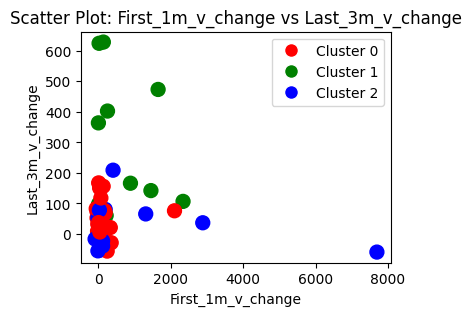

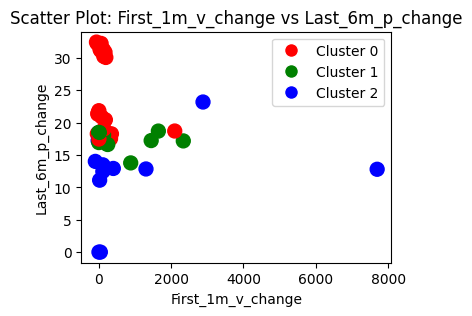

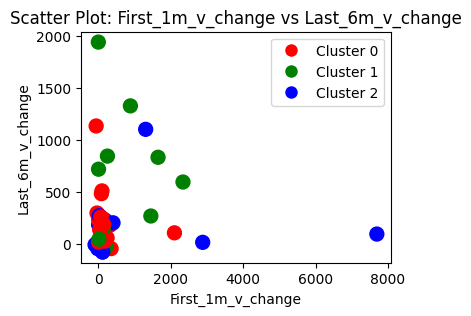

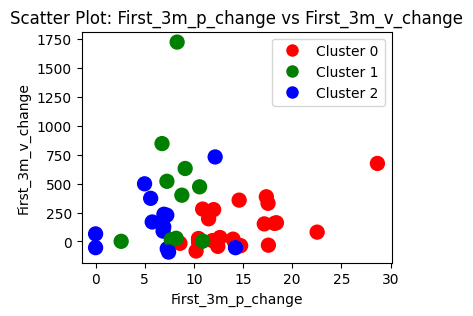

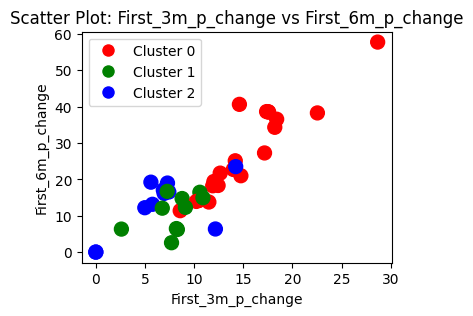

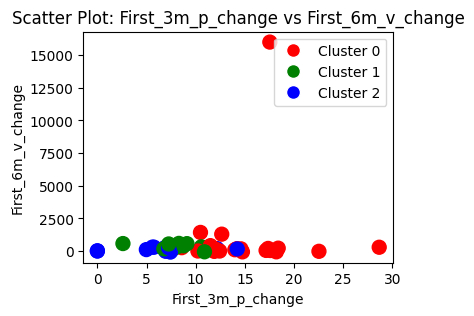

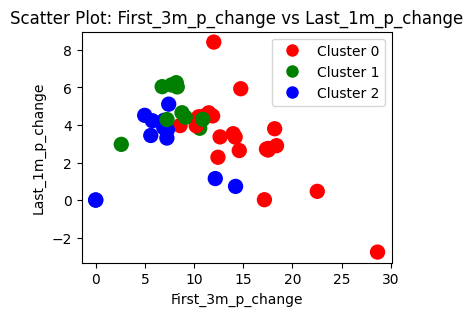

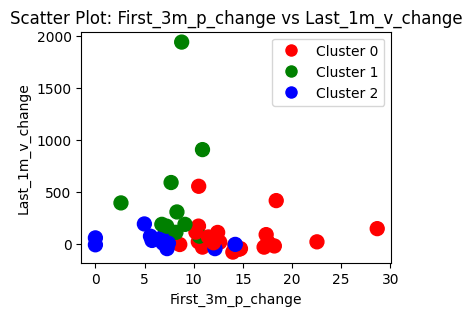

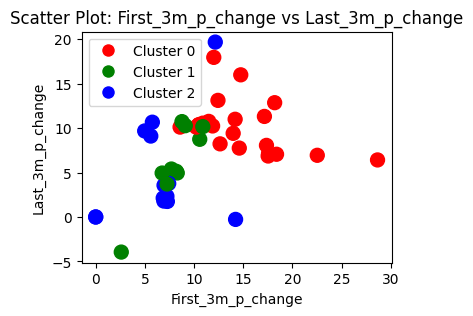

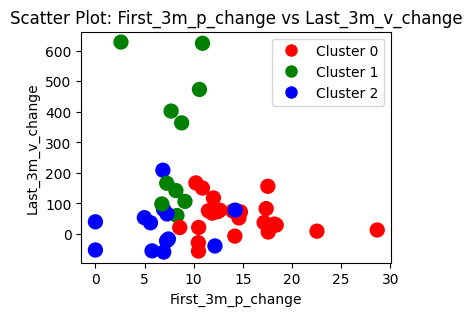

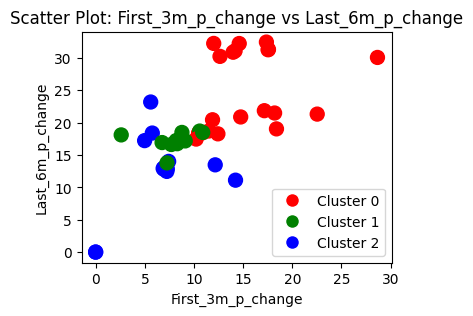

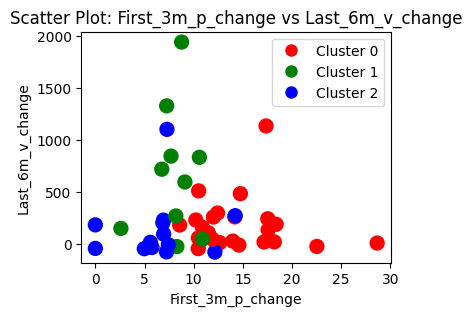

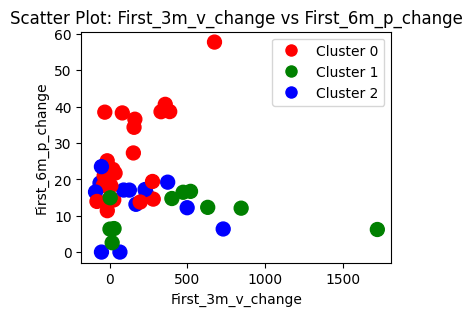

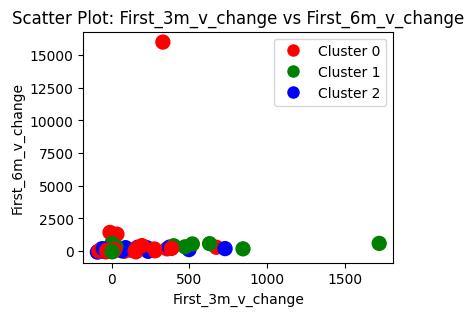

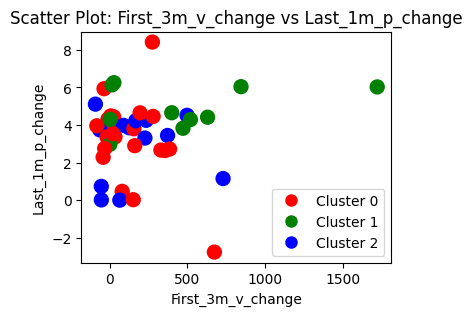

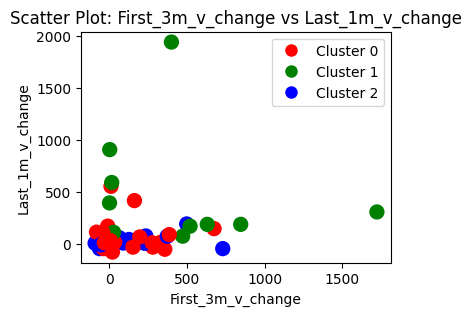

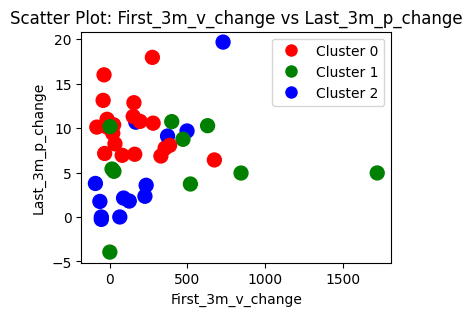

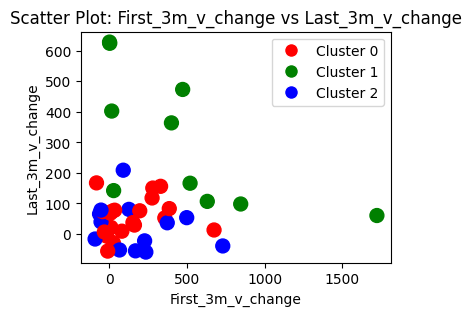

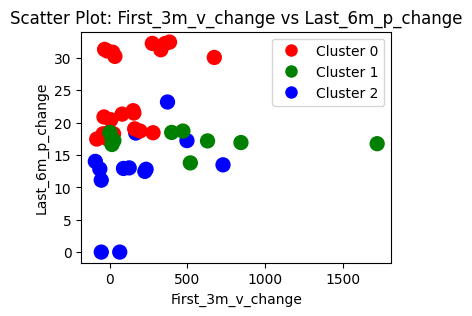

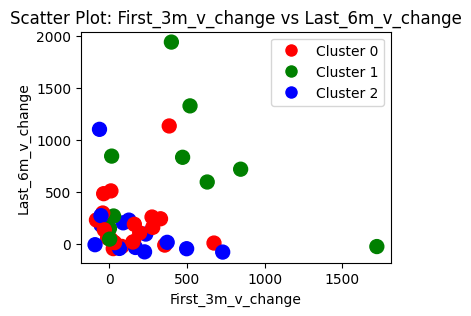

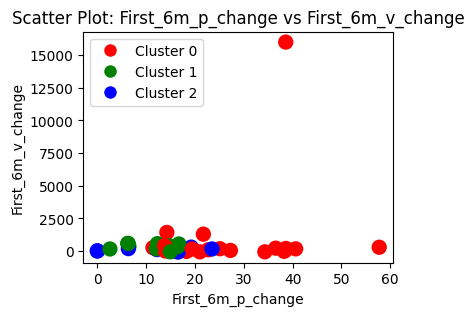

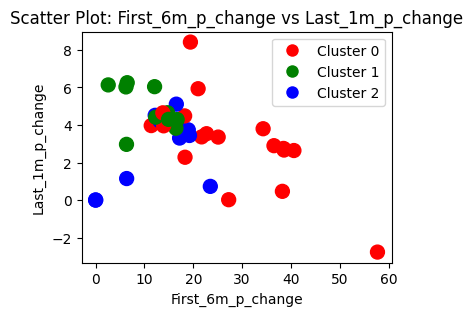

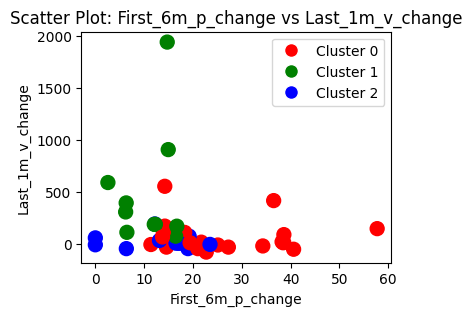

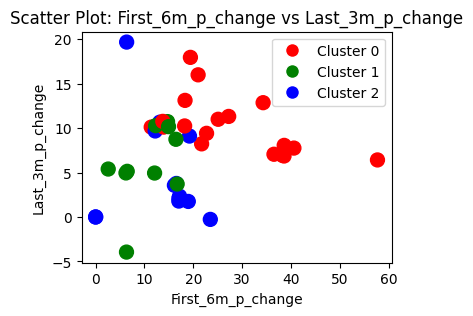

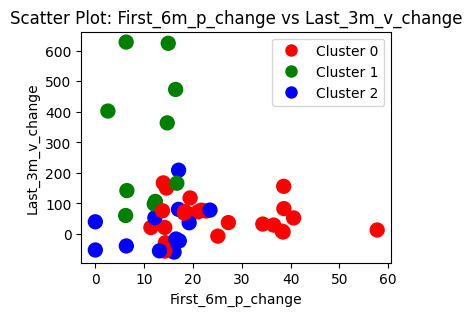

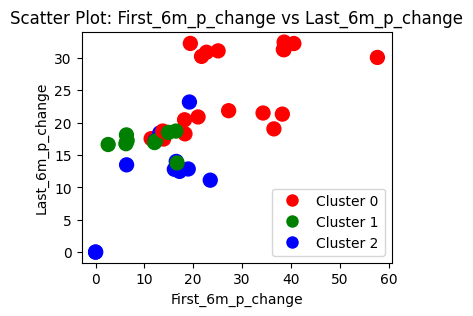

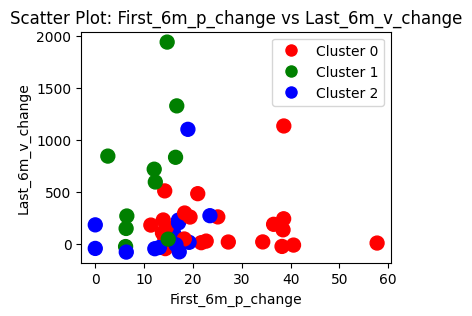

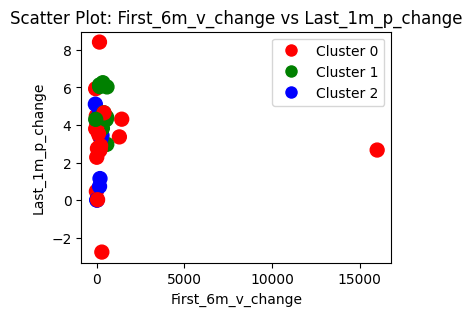

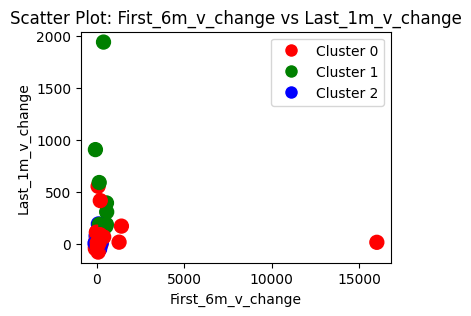

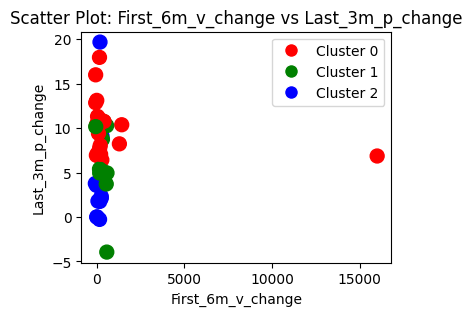

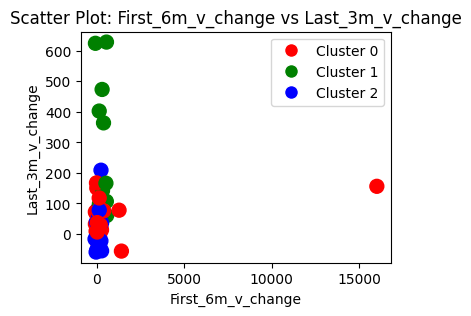

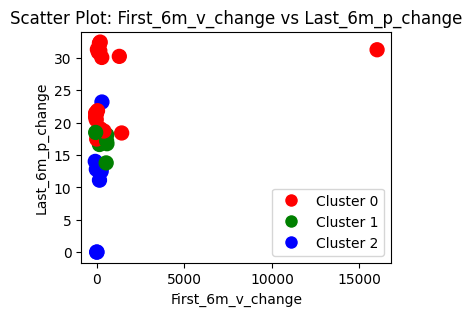

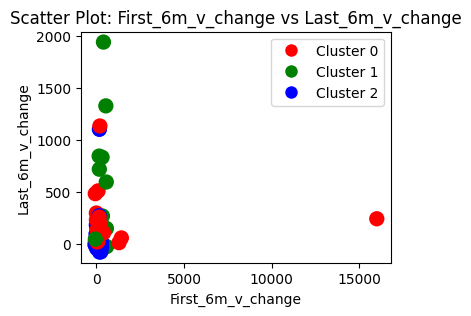

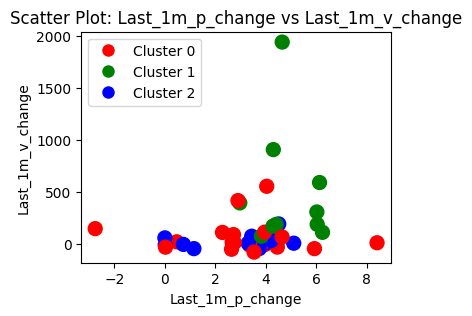

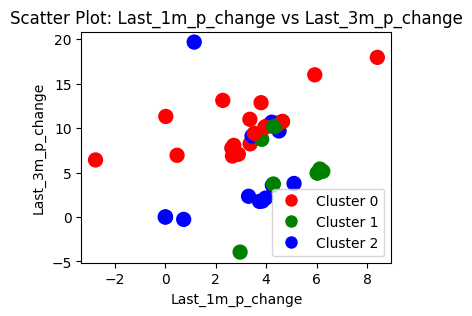

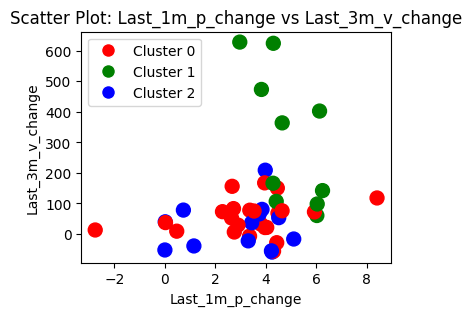

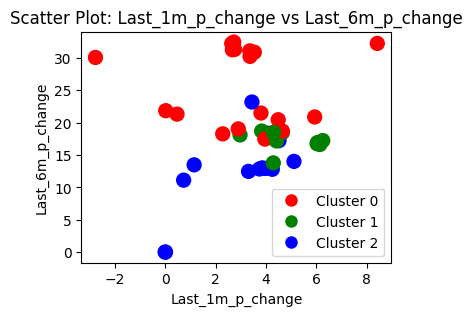

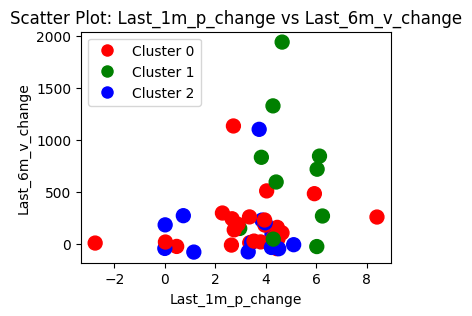

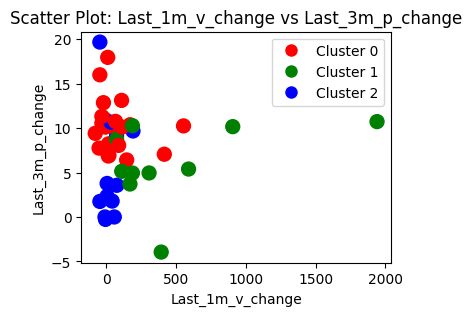

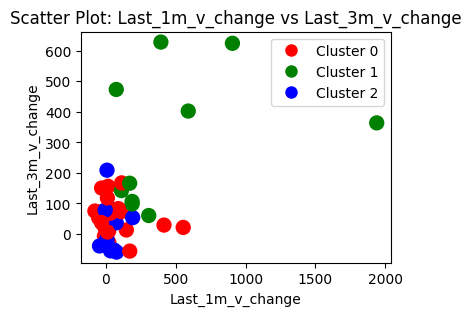

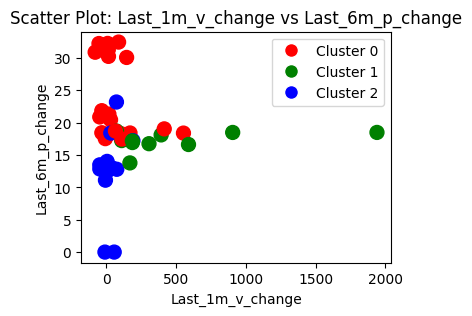

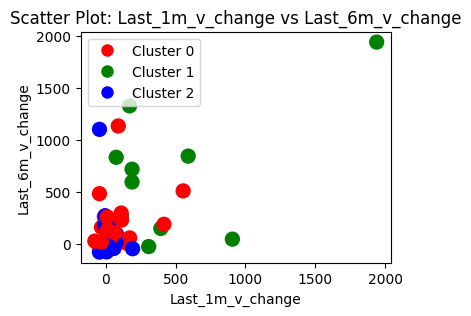

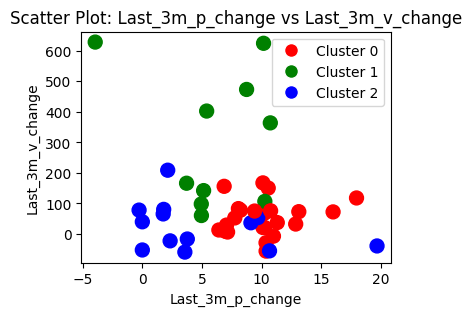

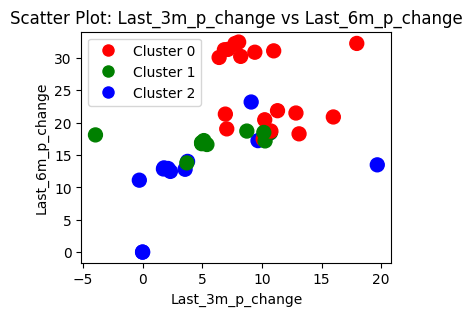

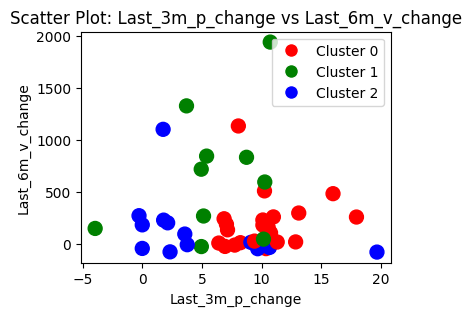

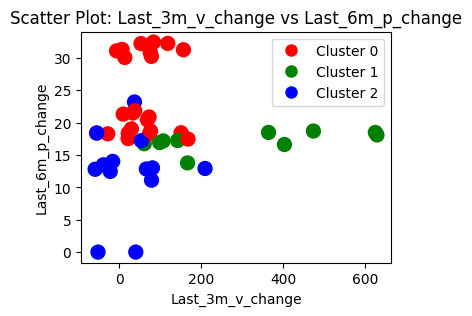

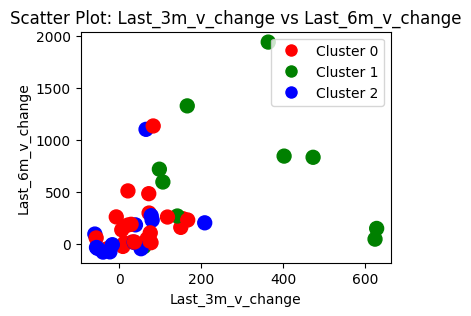

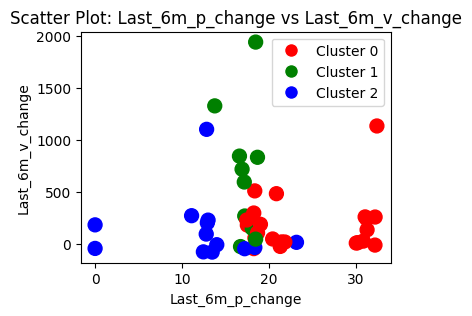

In [18]:
# List of all feature columns in df
feature_columns = [
    'First_1m_p_change', 'First_1m_v_change', 'First_3m_p_change',
    'First_3m_v_change', 'First_6m_p_change', 'First_6m_v_change',
    'Last_1m_p_change', 'Last_1m_v_change', 'Last_3m_p_change',
    'Last_3m_v_change', 'Last_6m_p_change', 'Last_6m_v_change'
]

# Get all pairs of features using itertools.combinations
feature_pairs = list(itertools.combinations(feature_columns, 2))

# Define a color map for clusters: 0 -> Red, 1 -> Green, 2 -> Blue
color_map = {0: 'red', 1: 'green', 2: 'blue'}

# Loop through each pair of features and create a scatter plot
for pair in feature_pairs:
    plt.figure(figsize=(4, 3))

    # Scatter plot with the two features and colored by 'Cluster_Label'
    cluster_colors = df_features['Cluster_Label'].map(color_map)

    plt.scatter(df_features[pair[0]], df_features[pair[1]], c=cluster_colors, s=100)

    # Set titles and labels
    plt.title(f'Scatter Plot: {pair[0]} vs {pair[1]}')
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])

    # Add a custom legend
    handles = [plt.Line2D([0], [0], marker='o', color='w', label='Cluster 0',
                          markerfacecolor='red', markersize=10),
               plt.Line2D([0], [0], marker='o', color='w', label='Cluster 1',
                          markerfacecolor='green', markersize=10),
               plt.Line2D([0], [0], marker='o', color='w', label='Cluster 2',
                          markerfacecolor='blue', markersize=10)]

    plt.legend(handles=handles)

    # Show the plot
    plt.show()

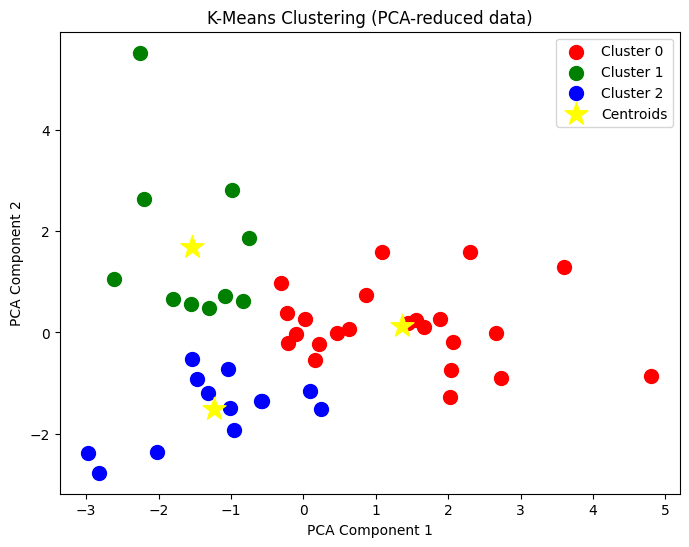

In [19]:
# Reduce the data to 2 dimensions for visualization using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the K-Means clusters
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']
for cluster in range(optimal_k):
    plt.scatter(X_pca[df_features['Cluster_Label'] == cluster, 0],
                X_pca[df_features['Cluster_Label'] == cluster, 1],
                s=100, c=colors[cluster], label=f'Cluster {cluster}')

# Mark the cluster centers
centers_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], s=300, c='yellow', marker='*', label='Centroids')

plt.title('K-Means Clustering (PCA-reduced data)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

In [20]:
# Add PCA cluster values to df_features
df_features['PCA_Component_1'] = X_pca[:, 0]
df_features['PCA_Component_2'] = X_pca[:, 1]

# Apply K-Means clustering with the optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_features['PCA_Cluster_Label'] = kmeans.fit_predict(X_pca)
df_features.head()

Ticker  First_1m_p_change  First_1m_v_change  First_3m_p_change  \
0     CPSEETF.NS          -0.726579         198.625683          28.661572   
1    AXISGOLD.NS           2.832806         187.763111           6.933439   
2   AXISNIFTY.NS          -3.791900         353.197218          10.466768   
3  IDFNIFTYET.NS          -3.965552         100.763359          10.505393   
4    ICICIB22.NS          -2.798238         -23.520258          22.533128   

   First_3m_v_change  First_6m_p_change  First_6m_v_change  Last_1m_p_change  \
0         674.370246          57.724664         286.341161         -2.764483   
1         126.328933          17.036455          64.701354          3.850584   
2          25.667489          14.343868          64.034104          4.433774   
3          10.687023          14.224871          91.984733          4.037452   
4          80.769078          38.251438         -24.608599          0.468566   

   Last_1m_v_change  Last_3m_p_change  Last_3m_v_change  Last_6m_p_change  \
0        146.143921          6.414368         12.964076         30.049647   
1         41.869582          1.790324         80.456688         12.999109   
2         20.805124         10.366672        -28.657878         18.257313   
3        553.424658         10.242740         21.374046         18.370528   
4         19.261977          6.936889          9.064200         21.302200   

   Last_6m_v_change  Cluster_Label  PCA_Component_1  PCA_Component_2  \
0          7.402814              0         4.807043        -0.863334   
1        227.894692              2        -1.314075        -1.188929   
2        -46.150082              0         0.162597        -0.538675   
3        508.936170              0        -0.307214         0.980057   
4        -25.009817              0         2.722977        -0.897901   

   PCA_Cluster_Label  
0                  0  
1                  2  
2                  2  
3                  1  
4                  0

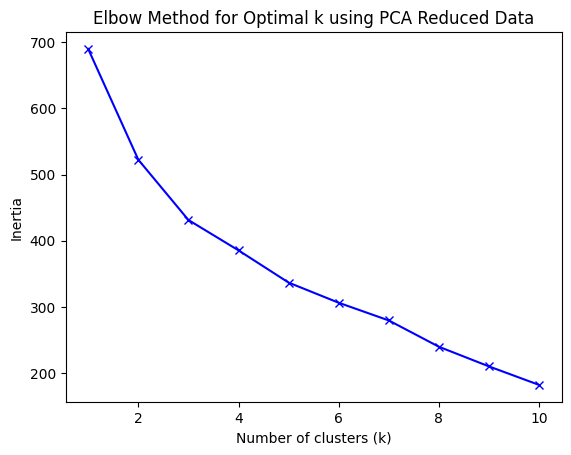

In [21]:
# Dropping 'Ticker' for modeling
X = df_features.drop(columns=['Ticker','Cluster_Label'])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow method to find optimal k
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.plot(k_range, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k using PCA Reduced Data')
plt.show()

In [22]:
features = [
    'First_1m_p_change', 'First_1m_v_change', 'First_3m_p_change',
    'First_3m_v_change', 'First_6m_p_change', 'First_6m_v_change',
    'Last_1m_p_change', 'Last_1m_v_change', 'Last_3m_p_change',
    'Last_3m_v_change', 'Last_6m_p_change', 'Last_6m_v_change'
]

# Standardize the feature data
X = df_features[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)

# Get the PCA components (loading vectors)
pca_components = pd.DataFrame(pca.components_, columns=features, index=['PCA_Component_1', 'PCA_Component_2'])

# Sort features by importance for PCA Component 1
print("Top features for PCA Component 1:")
print(pca_components.loc['PCA_Component_1'].abs().sort_values(ascending=False))

# Sort features by importance for PCA Component 2
print("\nTop features for PCA Component 2:")
print(pca_components.loc['PCA_Component_2'].abs().sort_values(ascending=False))

Top features for PCA Component 1:
First_3m_p_change    0.529917
First_6m_p_change    0.500902
Last_6m_p_change     0.451224
Last_3m_p_change     0.246050
Last_1m_p_change     0.199725
Last_1m_v_change     0.177979
Last_3m_v_change     0.177780
First_6m_v_change    0.171407
First_1m_p_change    0.163591
Last_6m_v_change     0.153128
First_1m_v_change    0.146194
First_3m_v_change    0.002286
Name: PCA_Component_1, dtype: float64

Top features for PCA Component 2:
Last_1m_v_change     0.491465
Last_3m_v_change     0.461962
Last_6m_v_change     0.445989
First_1m_p_change    0.343184
Last_1m_p_change     0.300875
Last_6m_p_change     0.239582
Last_3m_p_change     0.189170
First_1m_v_change    0.134698
First_6m_v_change    0.102055
First_3m_p_change    0.097252
First_3m_v_change    0.081467
First_6m_p_change    0.002680
Name: PCA_Component_2, dtype: float64


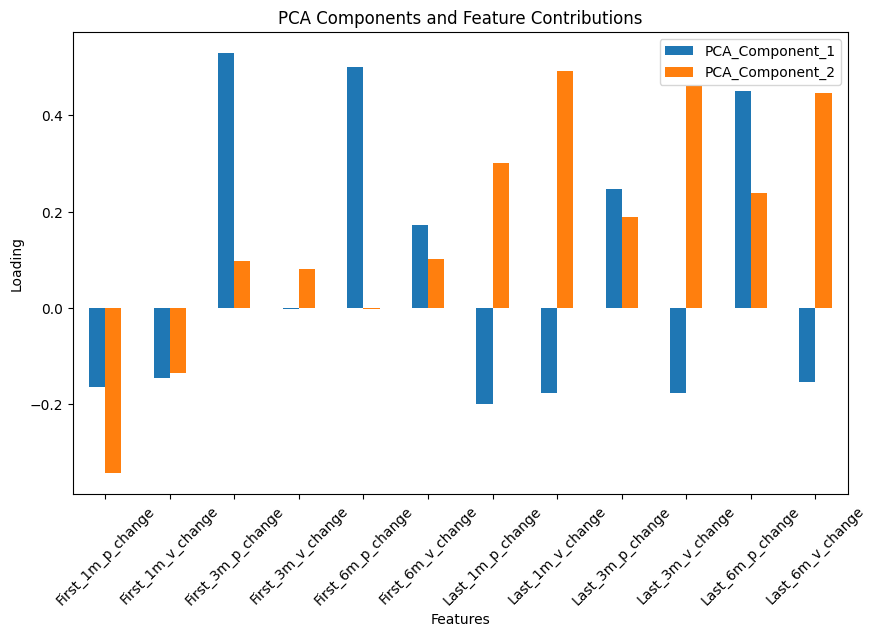

In [23]:
# Plot the feature contributions for PCA Component 1 and 2
pca_components.T.plot(kind='bar', figsize=(10,6))
plt.title('PCA Components and Feature Contributions')
plt.xlabel('Features')
plt.ylabel('Loading')
plt.xticks(rotation=45)
plt.show()



Accuracy: 0.9285714285714286

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       1.00      1.00      1.00         4
           2       0.80      1.00      0.89         4

    accuracy                           0.93        14
   macro avg       0.93      0.94      0.93        14
weighted avg       0.94      0.93      0.93        14



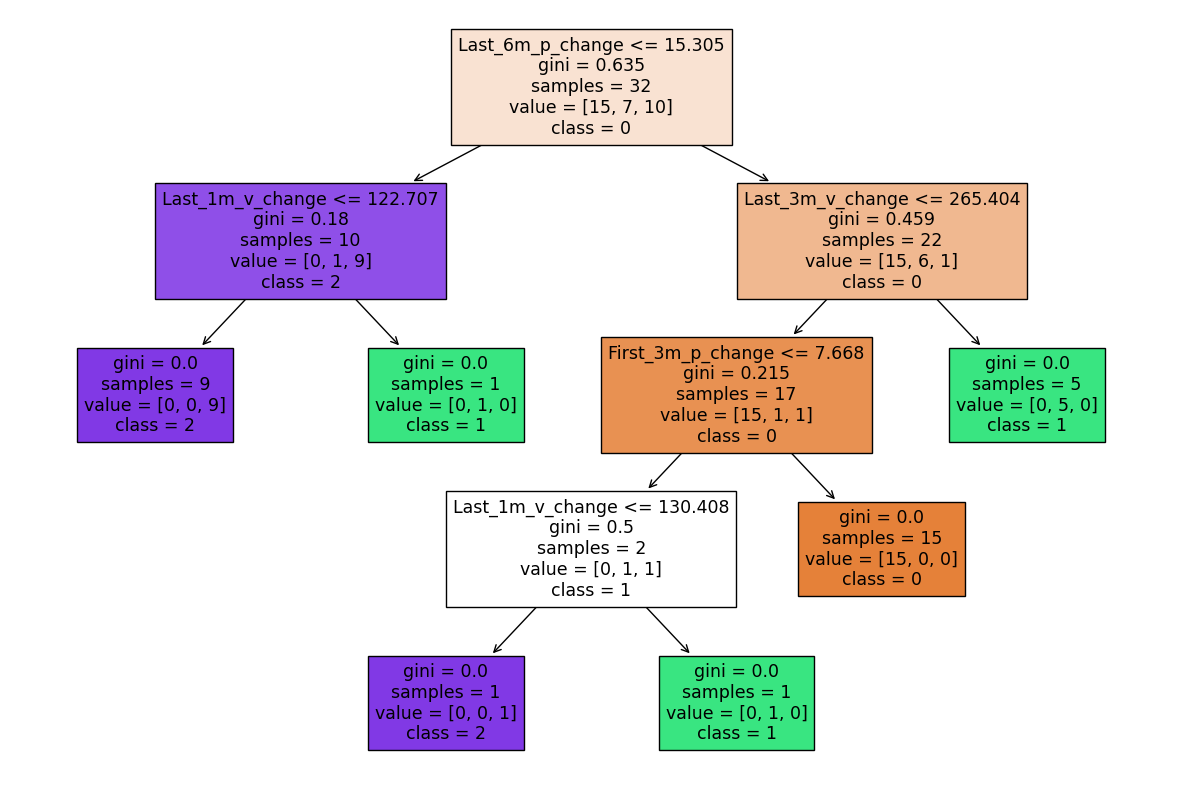

In [24]:
# Feature columns and target
X = df_features.drop(columns=['Ticker', 'Cluster_Label', 'PCA_Cluster_Label'])
y = df_features['PCA_Cluster_Label']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Train Decision Tree Classifier
dt1 = DecisionTreeClassifier(random_state=42)
dt1.fit(X_train, y_train)

# Predict on test set
y_pred = dt1.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot the Decision Tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt, feature_names=X.columns, class_names=[str(i) for i in range(optimal_k)], filled=True)
plt.show()




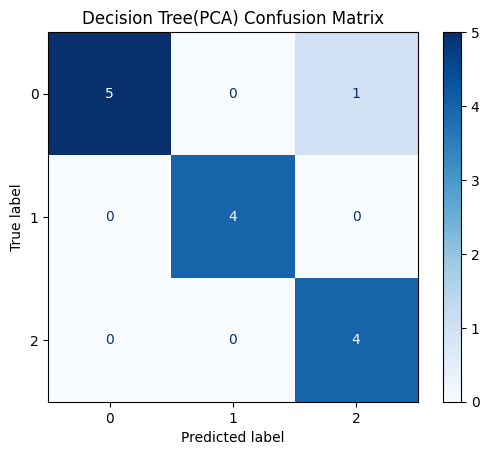

In [25]:
    ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)).plot(cmap=plt.cm.Blues)
    plt.title('Decision Tree(PCA) Confusion Matrix')
    plt.show()

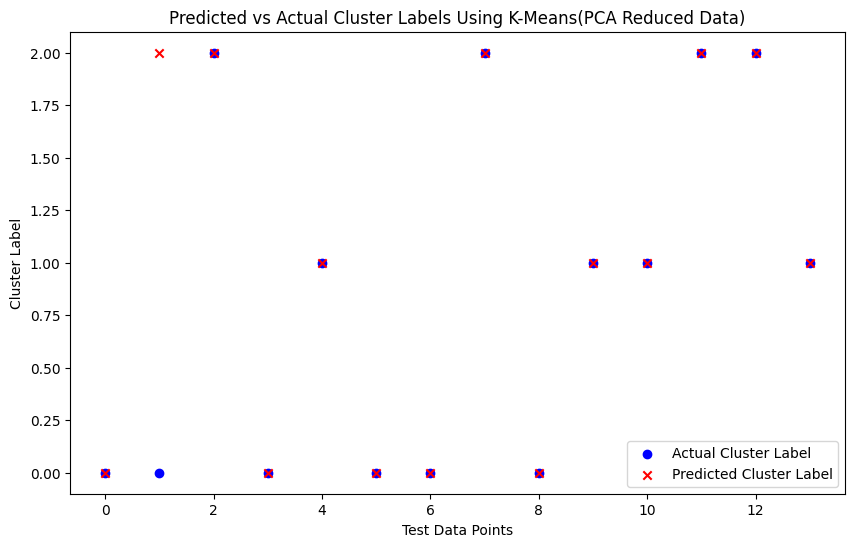

In [26]:
# Plot Predicted vs Actual Cluster Labels
plt.figure(figsize=(10, 6))

# X-axis values (test indices)
test_indices = np.arange(len(y_test))

# Plot actual labels
plt.scatter(test_indices, y_test, color='blue', label='Actual Cluster Label')

# Plot predicted labels
plt.scatter(test_indices, y_pred, color='red', marker='x', label='Predicted Cluster Label')

plt.title('Predicted vs Actual Cluster Labels Using K-Means(PCA Reduced Data)')
plt.xlabel('Test Data Points')
plt.ylabel('Cluster Label')
plt.legend()
plt.show()

In [28]:
# Merge df and df1 on the 'Ticker' column
df_final = df_raw.merge(df_features[['Ticker', 'Cluster_Label', 'PCA_Cluster_Label']], on='Ticker', how='left')

# Selecting the final columns: 'Name', 'Ticker', 'Close', 'Cluster_Label', 'PCA_Cluster_Label'
df_final = df_final[['Date', 'Name', 'Ticker', 'Close', 'Cluster_Label', 'PCA_Cluster_Label']]

df_final.head()

Date                       Name      Ticker      Close  Cluster_Label  \
0 2023-09-25  CPSE Exchange Traded Fund  CPSEETF.NS  52.299999              0   
1 2023-09-26  CPSE Exchange Traded Fund  CPSEETF.NS  52.470001              0   
2 2023-09-27  CPSE Exchange Traded Fund  CPSEETF.NS  52.660000              0   
3 2023-09-28  CPSE Exchange Traded Fund  CPSEETF.NS  52.520000              0   
4 2023-09-29  CPSE Exchange Traded Fund  CPSEETF.NS  53.580002              0   

   PCA_Cluster_Label  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0

In [29]:
df_final.to_csv("df_final.csv", index=False)

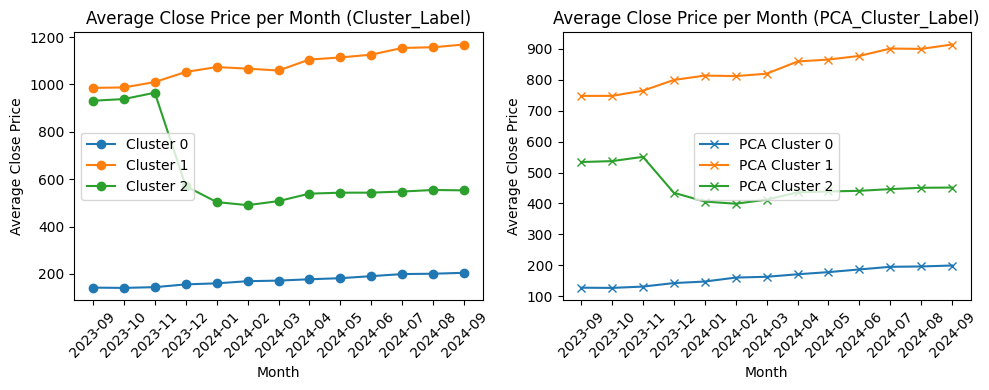

In [30]:
# Convert 'Date' to datetime format (if it's not already)
df_final['Date'] = pd.to_datetime(df_final['Date'])

# Group by month and 'Cluster_Label', and calculate the average 'Close' price
df_final['Month'] = df_final['Date'].dt.to_period('M')  # Aggregate by month
avg_close_cluster = df_final.groupby(['Month', 'Cluster_Label'])['Close'].mean().reset_index()

# Group by month and 'PCA_Cluster_Label', and calculate the average 'Close' price
avg_close_pca = df_final.groupby(['Month', 'PCA_Cluster_Label'])['Close'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 4))

# Plot for 'Cluster_Label'
plt.subplot(1, 2, 1)  # Two plots side by side
for cluster in avg_close_cluster['Cluster_Label'].unique():
    cluster_data = avg_close_cluster[avg_close_cluster['Cluster_Label'] == cluster]
    plt.plot(cluster_data['Month'].astype(str), cluster_data['Close'], label=f'Cluster {cluster}', marker='o')

plt.title('Average Close Price per Month (Cluster_Label)')
plt.xlabel('Month')
plt.ylabel('Average Close Price')
plt.xticks(rotation=45)
plt.legend()

# Plot for 'PCA_Cluster_Label'
plt.subplot(1, 2, 2)
for pca_cluster in avg_close_pca['PCA_Cluster_Label'].unique():
    pca_cluster_data = avg_close_pca[avg_close_pca['PCA_Cluster_Label'] == pca_cluster]
    plt.plot(pca_cluster_data['Month'].astype(str), pca_cluster_data['Close'], label=f'PCA Cluster {pca_cluster}', marker='x')

plt.title('Average Close Price per Month (PCA_Cluster_Label)')
plt.xlabel('Month')
plt.ylabel('Average Close Price')
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [31]:
# Group by 'Cluster_Label' and aggregate unique 'Name' values
unique_names_by_cluster = df_final.groupby('Cluster_Label')['Name'].agg(lambda x: list(set(x))).reset_index()

# Group by 'PCA_Cluster_Label' and aggregate unique 'Name' values
unique_names_by_pca_cluster = df_final.groupby('PCA_Cluster_Label')['Name'].agg(lambda x: list(set(x))).reset_index()

# Print unique names for each Cluster_Label
print("Unique Names grouped by Cluster_Label:")
for _, row in unique_names_by_cluster.iterrows():
    print(f"Cluster_Label: {row['Cluster_Label']}")
    for name in row['Name']:
        print(f"  - {name}")

# Print unique names for each PCA_Cluster_Label
print("\nUnique Names grouped by PCA_Cluster_Label:")
for _, row in unique_names_by_pca_cluster.iterrows():
    print(f"PCA_Cluster_Label: {row['PCA_Cluster_Label']}")
    for name in row['Name']:
        print(f"  - {name}")


Unique Names grouped by Cluster_Label:
Cluster_Label: 0
  - CPSE Exchange Traded Fund
  - LIC ETF-Nifty 50
  - Nippon ETF Infra BeES
  - ICICI Midcap Select ETF
  - Bharat 22 ETF
  - Nippon ETF Dividend Opportunities
  - HDFC Sensex ETF
  - ICICI Pru Nifty Next 50 ETF
  - IDFC Nifty 50 ETF
  - ICICI Nifty Low Vol 30 ETF
  - Nippon ETF Junior BeES
  - Aditya Birla Sun Life Nifty Next 50 ETF
  - ICICI Prudential Nifty 100 ETF
  - ICICI Prudential NV20 ETF
  - ICICI Alpha Low Vol 30 ETF
  - CPSE ETF
  - Motilal Oswal Midcap 100 ETF
  - Aditya Birla Sun Life Nifty 50 ETF
  - Bandhan Nifty 50 ETF
  - HDFC Nifty 50 ETF
  - Nippon ETF Consumption
  - Axis Nifty ETF
  - ICICI Pru Midcap 150 ETF
  - Motilal Oswal M50 ETF
  - Mirae Asset Nifty Next 50 ETF
Cluster_Label: 1
  - Kotak Banking ETF
  - Kotak Silver ETF Fund
  - SBI - ETF Nifty Next 50
  - Aditya Birla Sun Life Nifty Bank ETF
  - Invesco Nifty ETF
  - LIC ETF-Sensex
  - ICICI Pvt Banks ETF
  - ICICI Prudential Bank ETF
  - LIC ETF-Nif

In [32]:
# Calculate average 'Close' by 'Cluster_Label'
avg_close_cluster = df_final.groupby(['Date', 'Cluster_Label'])['Close'].mean().reset_index()
avg_close_cluster['% Change'] = avg_close_cluster.groupby('Cluster_Label')['Close'].pct_change() * 100

# Calculate average 'Close' by 'PCA_Cluster_Label'
avg_close_pca = df_final.groupby(['Date', 'PCA_Cluster_Label'])['Close'].mean().reset_index()
avg_close_pca['% Change'] = avg_close_pca.groupby('PCA_Cluster_Label')['Close'].pct_change() * 100

# Display the results
print(avg_close_cluster)
print(avg_close_pca)

          Date  Cluster_Label        Close  % Change
0   2023-09-25              0   142.162217       NaN
1   2023-09-25              1   991.513885       NaN
2   2023-09-25              2   939.968584       NaN
3   2023-09-26              0   142.687822  0.369722
4   2023-09-26              1   988.632240 -0.290631
..         ...            ...          ...       ...
727 2024-09-20              1  1186.829993  0.623837
728 2024-09-20              2   561.258945  0.709048
729 2024-09-23              0   209.084829  1.182121
730 2024-09-23              1  1197.779998  0.922626
731 2024-09-23              2   591.608345  5.407379

[732 rows x 4 columns]
          Date  PCA_Cluster_Label       Close  % Change
0   2023-09-25                  0  128.060296       NaN
1   2023-09-25                  1  751.454230       NaN
2   2023-09-25                  2  538.429792       NaN
3   2023-09-26                  0  128.227825  0.130820
4   2023-09-26                  1  750.591551 -0.114801
..  

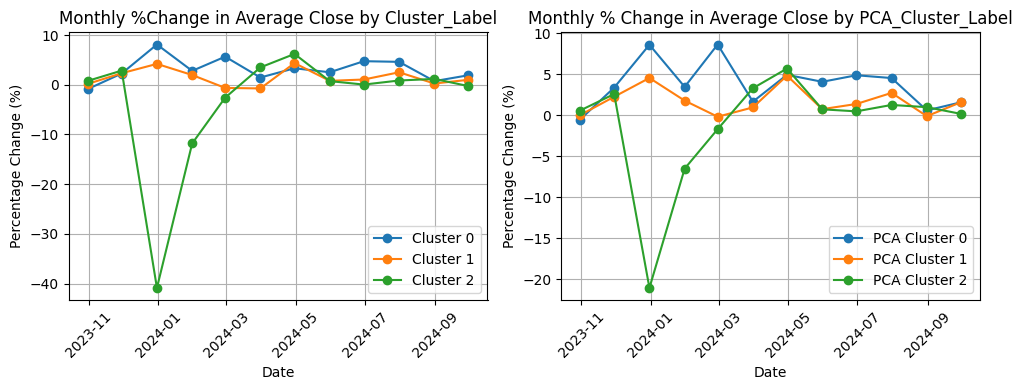

In [33]:
# Convert 'Date' to datetime if it's not already
df_final['Date'] = pd.to_datetime(df_final['Date'])

# Set 'Date' as the index
df_final = df_final.set_index('Date')

# Calculate average 'Close' by 'Cluster_Label' on a monthly basis
monthly_avg_close_cluster = df_final.groupby('Cluster_Label')['Close'].resample('M').mean().reset_index()
monthly_avg_close_cluster['% Change'] = monthly_avg_close_cluster.groupby('Cluster_Label')['Close'].pct_change() * 100

# Calculate average 'Close' by 'PCA_Cluster_Label' on a monthly basis
monthly_avg_close_pca = df_final.groupby('PCA_Cluster_Label')['Close'].resample('M').mean().reset_index()
monthly_avg_close_pca['% Change'] = monthly_avg_close_pca.groupby('PCA_Cluster_Label')['Close'].pct_change() * 100

# Plotting for monthly_avg_close_cluster
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
for label in monthly_avg_close_cluster['Cluster_Label'].unique():
    subset = monthly_avg_close_cluster[monthly_avg_close_cluster['Cluster_Label'] == label]
    plt.plot(subset['Date'], subset['% Change'], marker='o', label=f'Cluster {label}')

plt.title('Monthly %Change in Average Close by Cluster_Label')
plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Plotting for monthly_avg_close_pca
plt.subplot(1, 2, 2)
for label in monthly_avg_close_pca['PCA_Cluster_Label'].unique():
    subset = monthly_avg_close_pca[monthly_avg_close_pca['PCA_Cluster_Label'] == label]
    plt.plot(subset['Date'], subset['% Change'], marker='o', label=f'PCA Cluster {label}')

plt.title('Monthly % Change in Average Close by PCA_Cluster_Label')
plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
